# 모형 최적화
- validation_curve : 단일 파라미터 최적화
- GridSearchCV : 그리드를 사용하여 복수의 파라미터 최적화
- ParameterGrid : 복수 파라미터 최적화용 그리드

## validation curve
- from sklearn.model_selection import validation_curve
- train_score, test_score 값을 반환한다. 
- parameter
   - param_name
   - param_range
   - scoring
   - cv

## GridSearchCV
- 클래스 객체에 fit 메서드를 호출하면 grid search를 사용해서 복수의 내부 모형을 생성한 후 이를 모두 실행시켜서 최적의 파라미터를 찾아준다. 
- from sklearn.model_selection import GridSearchCV
- 속성
   - grid_scores_ : param_grid의 모든 파라미터 조합에 대한 성능 결과. 
      - parameters
      - mean_validation_score : 교차 검증 결과 평균값
      - cv_validation_scores : 모든 교차 검증 결과
   - best_score_ : 최고 점수
   - best_params_ : 최고 점수를 낸 파라미터 조합
   - best_estimator_ : 최고 점수를 낸 파라미터를 가진 모형
   
## ParameterGrid
- 파라미터들을 조합하여 탐색 그리드를 생성해준다.
- GridSearchCV의 방법외에 그리드 탐색이 필요한 경우 사용

## sklearn docs : hyper parameter tunning 
- 하이퍼 파라미터는 모형에서 학습되지 않는다. 
- GridSearchCV와 RandomizedSearchCV 가 있다.
   - GridSearchCV는 모든 매개변수 조합을 찾는다.
   - RandomizedSearchCV는 지정된 분포(distribution)를 가진 매개변수 공간에서의 조합을 찾는다.
- 연속반감기 CV
   - HalvingGridSearchCV, HalvingRandomoizedSearchCV
   - 실험 회차별 데이터 샘플의 수가 증가하고, 상위성능 절반이 후보(parameter 조합)가 되어 점점 줄어드는 방식
   - n_iterations_, n_candidates_, n_resources_

- 하이퍼파라미터 튜닝에 관한 여러가지 방법론들
   - 중첩, 비중첩 교차 검증 : gridCV를 다시한번 cross_val_score로 실행하기
      - https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html#sphx-glr-auto-examples-model-selection-plot-nested-cross-validation-iris-py
   - cv 와 gridcv의 다중 측정항목을 나타내기 : 여러 반환값을 시각화
      - https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py
   - 모델 복잡성과 교차검증 점수의 균형 맞추기 : 
      - https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_refit_callable.html#sphx-glr-auto-examples-model-selection-plot-grid-search-refit-callable-py
   - 그리드 모델의 통계적 비교
      - https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html#sphx-glr-auto-examples-model-selection-plot-grid-search-stats-py


## validation curve
- parameter
    - param_name
    - param_range
    - scoring

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC

In [3]:
digits = load_digits()
X, y = digits.data, digits.target

In [4]:
X.shape, y.shape

((1797, 64), (1797,))

In [6]:
param_range = np.logspace(-6, -1, 10)
param_range

array([1.00000000e-06, 3.59381366e-06, 1.29154967e-05, 4.64158883e-05,
       1.66810054e-04, 5.99484250e-04, 2.15443469e-03, 7.74263683e-03,
       2.78255940e-02, 1.00000000e-01])

In [9]:
param_range[0]

1e-06

In [22]:
%%time
train_scores, test_scores = \
    validation_curve(SVC(), X, y, 
                     param_name="gamma", param_range=param_range, cv=10, 
                     scoring="accuracy", n_jobs=1)

CPU times: total: 44.3 s
Wall time: 46.9 s


In [23]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

In [30]:
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [31]:
train_scores_mean

array([0.13836306, 0.72045751, 0.93439655, 0.96939318, 0.98775736,
       0.99789765, 1.        , 1.        , 1.        , 1.        ])

In [32]:
train_scores_std

array([0.06061766, 0.01032486, 0.00377997, 0.00261459, 0.00102754,
       0.00056702, 0.        , 0.        , 0.        , 0.        ])

In [35]:
%matplotlib inline

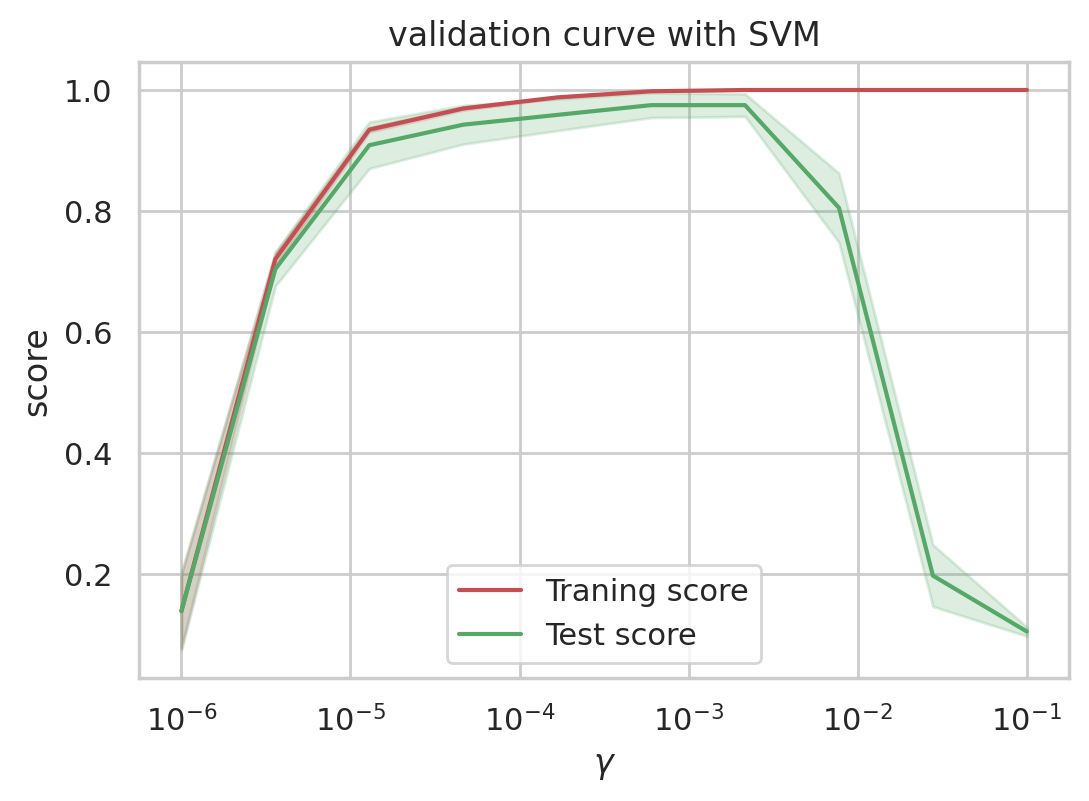

In [39]:
# xticks의 - 자승 표시 font
plt.rcParams["font.family"] = "DejaVu Sans"

plt.semilogx(param_range, train_scores_mean, label="Traning score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2, color="r")

plt.semilogx(param_range, test_scores_mean, label="Test score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std, 
                test_scores_mean + test_scores_std, alpha=0.2, color="g")

plt.legend(loc="best")
plt.xlabel("$\gamma$")
plt.ylabel("score")
plt.title("validation curve with SVM")

plt.show() ; 

## GridSearchCV
- 

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [42]:
pipe_svc = Pipeline([("scaler", StandardScaler()), ("clf", SVC(random_state=1))])
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [
    {"clf__C": param_range, "clf__kernel": ["linear"]},
    {"clf__C": param_range, "clf__gamma": param_range, "clf__kernel": ["rbf"]}]
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid,
                 scoring="accuracy", cv=10, n_jobs=1)

%time gs = gs.fit(X, y)

CPU times: total: 2min 54s
Wall time: 3min 13s


In [43]:
pd.DataFrame(gs.cv_results_).sort_values("rank_test_score", ascending=True)[:10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__kernel,param_clf__gamma,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
66,0.049465,0.000654,0.015762,0.001164,1000.0,rbf,0.01,"{'clf__C': 1000.0, 'clf__gamma': 0.01, 'clf__k...",0.933333,0.994444,...,0.955556,0.988889,0.977778,0.977778,0.949721,0.972067,0.960894,0.969379,0.018168,1
58,0.050631,0.001441,0.015894,0.000712,100.0,rbf,0.01,"{'clf__C': 100.0, 'clf__gamma': 0.01, 'clf__ke...",0.933333,0.994444,...,0.955556,0.988889,0.977778,0.977778,0.949721,0.972067,0.960894,0.969379,0.018168,1
50,0.051861,0.000772,0.016757,0.000869,10.0,rbf,0.01,"{'clf__C': 10.0, 'clf__gamma': 0.01, 'clf__ker...",0.933333,0.994444,...,0.955556,0.988889,0.977778,0.977778,0.949721,0.972067,0.960894,0.969379,0.018168,1
57,0.036404,0.001201,0.011470,0.000500,100.0,rbf,0.001,"{'clf__C': 100.0, 'clf__gamma': 0.001, 'clf__k...",0.922222,0.994444,...,0.955556,0.977778,0.972222,0.972222,0.960894,0.932961,0.966480,0.960478,0.020297,4
42,0.055748,0.001446,0.018051,0.000533,1.0,rbf,0.01,"{'clf__C': 1.0, 'clf__gamma': 0.01, 'clf__kern...",0.944444,0.994444,...,0.911111,0.983333,0.972222,0.972222,0.949721,0.960894,0.949721,0.960478,0.022172,4
65,0.035406,0.000920,0.011568,0.000487,1000.0,rbf,0.001,"{'clf__C': 1000.0, 'clf__gamma': 0.001, 'clf__...",0.916667,0.994444,...,0.961111,0.972222,0.972222,0.977778,0.960894,0.927374,0.955307,0.959358,0.021870,6
64,0.034911,0.000011,0.010667,0.000631,1000.0,rbf,0.0001,"{'clf__C': 1000.0, 'clf__gamma': 0.0001, 'clf_...",0.922222,0.988889,...,0.938889,0.972222,0.972222,0.983333,0.983240,0.932961,0.949721,0.958259,0.023115,7
7,0.028623,0.000639,0.003690,0.000457,1000.0,linear,NaN,"{'clf__C': 1000.0, 'clf__kernel': 'linear'}",0.911111,0.988889,...,0.938889,0.966667,0.966667,0.988889,0.977654,0.938547,0.944134,0.956589,0.023965,8
5,0.031317,0.001551,0.004187,0.000743,10.0,linear,NaN,"{'clf__C': 10.0, 'clf__kernel': 'linear'}",0.911111,0.988889,...,0.938889,0.966667,0.966667,0.988889,0.977654,0.938547,0.944134,0.956589,0.023965,8
4,0.030116,0.000401,0.003794,0.000401,1.0,linear,NaN,"{'clf__C': 1.0, 'clf__kernel': 'linear'}",0.911111,0.988889,...,0.938889,0.966667,0.966667,0.988889,0.977654,0.938547,0.944134,0.956589,0.023965,8


In [47]:
gs.cv_results_["mean_test_score"]

array([0.23120112, 0.91485413, 0.95046245, 0.95547176, 0.95658908,
       0.95658908, 0.95658908, 0.95658908, 0.13089385, 0.13536313,
       0.13927374, 0.12418994, 0.1001676 , 0.13089385, 0.10687151,
       0.1001676 , 0.13089385, 0.13536313, 0.13927374, 0.12418994,
       0.1001676 , 0.13089385, 0.10687151, 0.1001676 , 0.13089385,
       0.13536313, 0.14429857, 0.12418994, 0.1001676 , 0.13089385,
       0.10687151, 0.1001676 , 0.13089385, 0.68335816, 0.90761639,
       0.40958101, 0.1001676 , 0.13089385, 0.10687151, 0.1001676 ,
       0.70449721, 0.93153011, 0.96047796, 0.90317505, 0.12469894,
       0.1001676 , 0.10128492, 0.1001676 , 0.93264742, 0.95547176,
       0.96937927, 0.90540348, 0.13416511, 0.1001676 , 0.10128492,
       0.1001676 , 0.95547796, 0.96047796, 0.96937927, 0.90540348,
       0.13416511, 0.1001676 , 0.10128492, 0.1001676 , 0.95825885,
       0.95935754, 0.96937927, 0.90540348, 0.13416511, 0.1001676 ,
       0.10128492, 0.1001676 ])

In [48]:
gs.best_score_

0.969379267535692

In [49]:
gs.best_params_

{'clf__C': 10.0, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}

In [50]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', SVC(C=10.0, gamma=0.01, random_state=1))])

## ParameterGrid

In [51]:
from sklearn.model_selection import ParameterGrid

In [53]:
param_grid = {"a": [1, 2], "b": [True, False]}

list(ParameterGrid(param_grid))

[{'a': 1, 'b': True},
 {'a': 1, 'b': False},
 {'a': 2, 'b': True},
 {'a': 2, 'b': False}]

In [54]:
param_grid = [{"kernel": ["linear"]}, {"kernel": ["rbf"], "gamma": [1, 5]}]

list(ParameterGrid(param_grid))

[{'kernel': 'linear'},
 {'gamma': 1, 'kernel': 'rbf'},
 {'gamma': 5, 'kernel': 'rbf'}]

In [56]:
param_grid = [{"kernel": ["linear", "rbf", "poly", "sigmoid"], 
              "gamma": [0.01, 0.1, 1, 10, 100],
              "C": [0.01, 0.1, 1, 10, 100],
              "decision_fuction_shape": ["ovo", "ovr"]}]

len(list(ParameterGrid(param_grid)))

200

## 병렬처리
- GridSearchCV의 n_jobs 파라미터
   - CPU 코어수를 설정하여 멀티 프로세스를 사용하는 방식

In [60]:
param_grid = {"gamma": np.logspace(-6, -1, 10)}
gs1 = GridSearchCV(estimator=SVC(), param_grid=param_grid,
                  cv=5, scoring="accuracy", n_jobs=1)
gs2 = GridSearchCV(estimator=SVC(), param_grid=param_grid,
                  cv=5, scoring="accuracy", n_jobs=2)

In [61]:
%%time
gs1.fit(X, y)

CPU times: total: 9.44 s
Wall time: 9.53 s


GridSearchCV(cv=5, estimator=SVC(), n_jobs=1,
             param_grid={'gamma': array([1.00000000e-06, 3.59381366e-06, 1.29154967e-05, 4.64158883e-05,
       1.66810054e-04, 5.99484250e-04, 2.15443469e-03, 7.74263683e-03,
       2.78255940e-02, 1.00000000e-01])},
             scoring='accuracy')

In [63]:
%%time
gs2.fit(X, y)

CPU times: total: 46.9 ms
Wall time: 5.17 s


GridSearchCV(cv=5, estimator=SVC(), n_jobs=2,
             param_grid={'gamma': array([1.00000000e-06, 3.59381366e-06, 1.29154967e-05, 4.64158883e-05,
       1.66810054e-04, 5.99484250e-04, 2.15443469e-03, 7.74263683e-03,
       2.78255940e-02, 1.00000000e-01])},
             scoring='accuracy')

In [65]:
gs3 = GridSearchCV(estimator=SVC(), param_grid=param_grid,
                  cv=5, scoring="accuracy", n_jobs=3)

In [66]:
%%time
gs3.fit(X, y)

CPU times: total: 78.1 ms
Wall time: 5.27 s


GridSearchCV(cv=5, estimator=SVC(), n_jobs=3,
             param_grid={'gamma': array([1.00000000e-06, 3.59381366e-06, 1.29154967e-05, 4.64158883e-05,
       1.66810054e-04, 5.99484250e-04, 2.15443469e-03, 7.74263683e-03,
       2.78255940e-02, 1.00000000e-01])},
             scoring='accuracy')

## cross_val_score, GridSearchCV의 다중 측정 항목
- 여러가지 반환값들을 그래프로 나타내기

In [1]:
from sklearn.datasets import make_hastie_10_2
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [2]:
X, y = make_hastie_10_2(n_samples=8000, random_state=42)

In [3]:
X.shape, y.shape

((8000, 10), (8000,))

In [5]:
X[:5]

array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
        -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004],
       [-0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
        -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ],
       [ 1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
         0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375],
       [-0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
        -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124],
       [ 0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
        -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016]])

In [6]:
y[:5]

array([-1.,  1., -1.,  1., -1.])

In [7]:
np.unique(y, return_counts=True)

(array([-1.,  1.]), array([3966, 4034], dtype=int64))

### make_scorer
- 성능 지표나 손실 함수로부터 점수 지표를 만든다.
- 이것을 GridCV에 적용할 수 있다. 

In [8]:
scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}
scoring

{'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

In [10]:
help(make_scorer)

Help on function make_scorer in module sklearn.metrics._scorer:

make_scorer(score_func, *, greater_is_better=True, needs_proba=False, needs_threshold=False, **kwargs)
    Make a scorer from a performance metric or loss function.
    
    This factory function wraps scoring functions for use in
    :class:`~sklearn.model_selection.GridSearchCV` and
    :func:`~sklearn.model_selection.cross_val_score`.
    It takes a score function, such as :func:`~sklearn.metrics.accuracy_score`,
    :func:`~sklearn.metrics.mean_squared_error`,
    :func:`~sklearn.metrics.adjusted_rand_score` or
    :func:`~sklearn.metrics.average_precision_score`
    and returns a callable that scores an estimator's output.
    The signature of the call is `(estimator, X, y)` where `estimator`
    is the model to be evaluated, `X` is the data and `y` is the
    ground truth labeling (or `None` in the case of unsupervised models).
    
    Read more in the :ref:`User Guide <scoring>`.
    
    Parameters
    ----------

### GridSearchCV의 refit 파라미터
- refit="AUC"
   - train, test 데이터 세트에 cv를 적용한 AUC 값을 반환한다.
   - clf.best_score_, clf.best_estimator_, clf.best_params_ 에서 가져올 수 있다.
   - 즉 새로운 평가 지표를 GridSearchCV에 추가 할 수 있다.

In [11]:
gs = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid={"min_samples_split": range(2, 403, 20)},
    scoring=scoring,
    refit="AUC",
    n_jobs=2,
    return_train_score=True
)

gs.fit(X, y)
results = gs.cv_results_

In [15]:
result_df = pd.DataFrame(results)
result_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,...,mean_test_Accuracy,std_test_Accuracy,rank_test_Accuracy,split0_train_Accuracy,split1_train_Accuracy,split2_train_Accuracy,split3_train_Accuracy,split4_train_Accuracy,mean_train_Accuracy,std_train_Accuracy
0,0.273738,0.006091,0.003779,0.001593,2,{'min_samples_split': 2},0.750681,0.781332,0.793312,0.777691,...,0.775000,0.013959,8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.275081,0.011453,0.002983,0.000007,22,{'min_samples_split': 22},0.803303,0.841271,0.839880,0.834702,...,0.789500,0.013730,4,0.933906,0.925937,0.930937,0.931250,0.926562,0.929719,0.003021
2,0.268290,0.012047,0.003184,0.000403,42,{'min_samples_split': 42},0.824982,0.849409,0.852856,0.854352,...,0.795875,0.012970,1,0.910625,0.900312,0.906250,0.908438,0.905156,0.906156,0.003474
3,0.260519,0.008586,0.002781,0.000416,62,{'min_samples_split': 62},0.839375,0.855923,0.857674,0.864427,...,0.794000,0.010137,2,0.889219,0.885938,0.891563,0.890469,0.891094,0.889656,0.002019
4,0.257281,0.018340,0.002792,0.000398,82,{'min_samples_split': 82},0.846684,0.865711,0.859966,0.870002,...,0.792750,0.010930,3,0.870625,0.867344,0.871719,0.871406,0.874531,0.871125,0.002306


#### refit 파라미터로 설정한 성능지표가 계산되어 반환된다.

In [17]:
result_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_min_samples_split', 'params', 'split0_test_AUC',
       'split1_test_AUC', 'split2_test_AUC', 'split3_test_AUC',
       'split4_test_AUC', 'mean_test_AUC', 'std_test_AUC', 'rank_test_AUC',
       'split0_train_AUC', 'split1_train_AUC', 'split2_train_AUC',
       'split3_train_AUC', 'split4_train_AUC', 'mean_train_AUC',
       'std_train_AUC', 'split0_test_Accuracy', 'split1_test_Accuracy',
       'split2_test_Accuracy', 'split3_test_Accuracy', 'split4_test_Accuracy',
       'mean_test_Accuracy', 'std_test_Accuracy', 'rank_test_Accuracy',
       'split0_train_Accuracy', 'split1_train_Accuracy',
       'split2_train_Accuracy', 'split3_train_Accuracy',
       'split4_train_Accuracy', 'mean_train_Accuracy', 'std_train_Accuracy'],
      dtype='object')

#### refit 을 사용하지 않은 경우 acc만 계산됨

In [20]:
gs_test = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid={"min_samples_split": range(2, 403, 20)},
    scoring="accuracy",
    n_jobs=2,
    return_train_score=True)

gs_test.fit(X, y)
test_df = pd.DataFrame(gs_test.cv_results_)
test_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_min_samples_split', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [144]:
gs.best_score_

0.8612498435391694

In [145]:
gs.best_params_

{'min_samples_split': 82}

In [146]:
gs.best_estimator_

DecisionTreeClassifier(min_samples_split=82, random_state=42)

### ploting results

In [23]:
results["param_min_samples_split"].data

array([2, 22, 42, 62, 82, 102, 122, 142, 162, 182, 202, 222, 242, 262,
       282, 302, 322, 342, 362, 382, 402], dtype=object)

In [24]:
X_axis = np.array(results["param_min_samples_split"].data, dtype=float)
X_axis

array([  2.,  22.,  42.,  62.,  82., 102., 122., 142., 162., 182., 202.,
       222., 242., 262., 282., 302., 322., 342., 362., 382., 402.])

In [55]:
%matplotlib inline

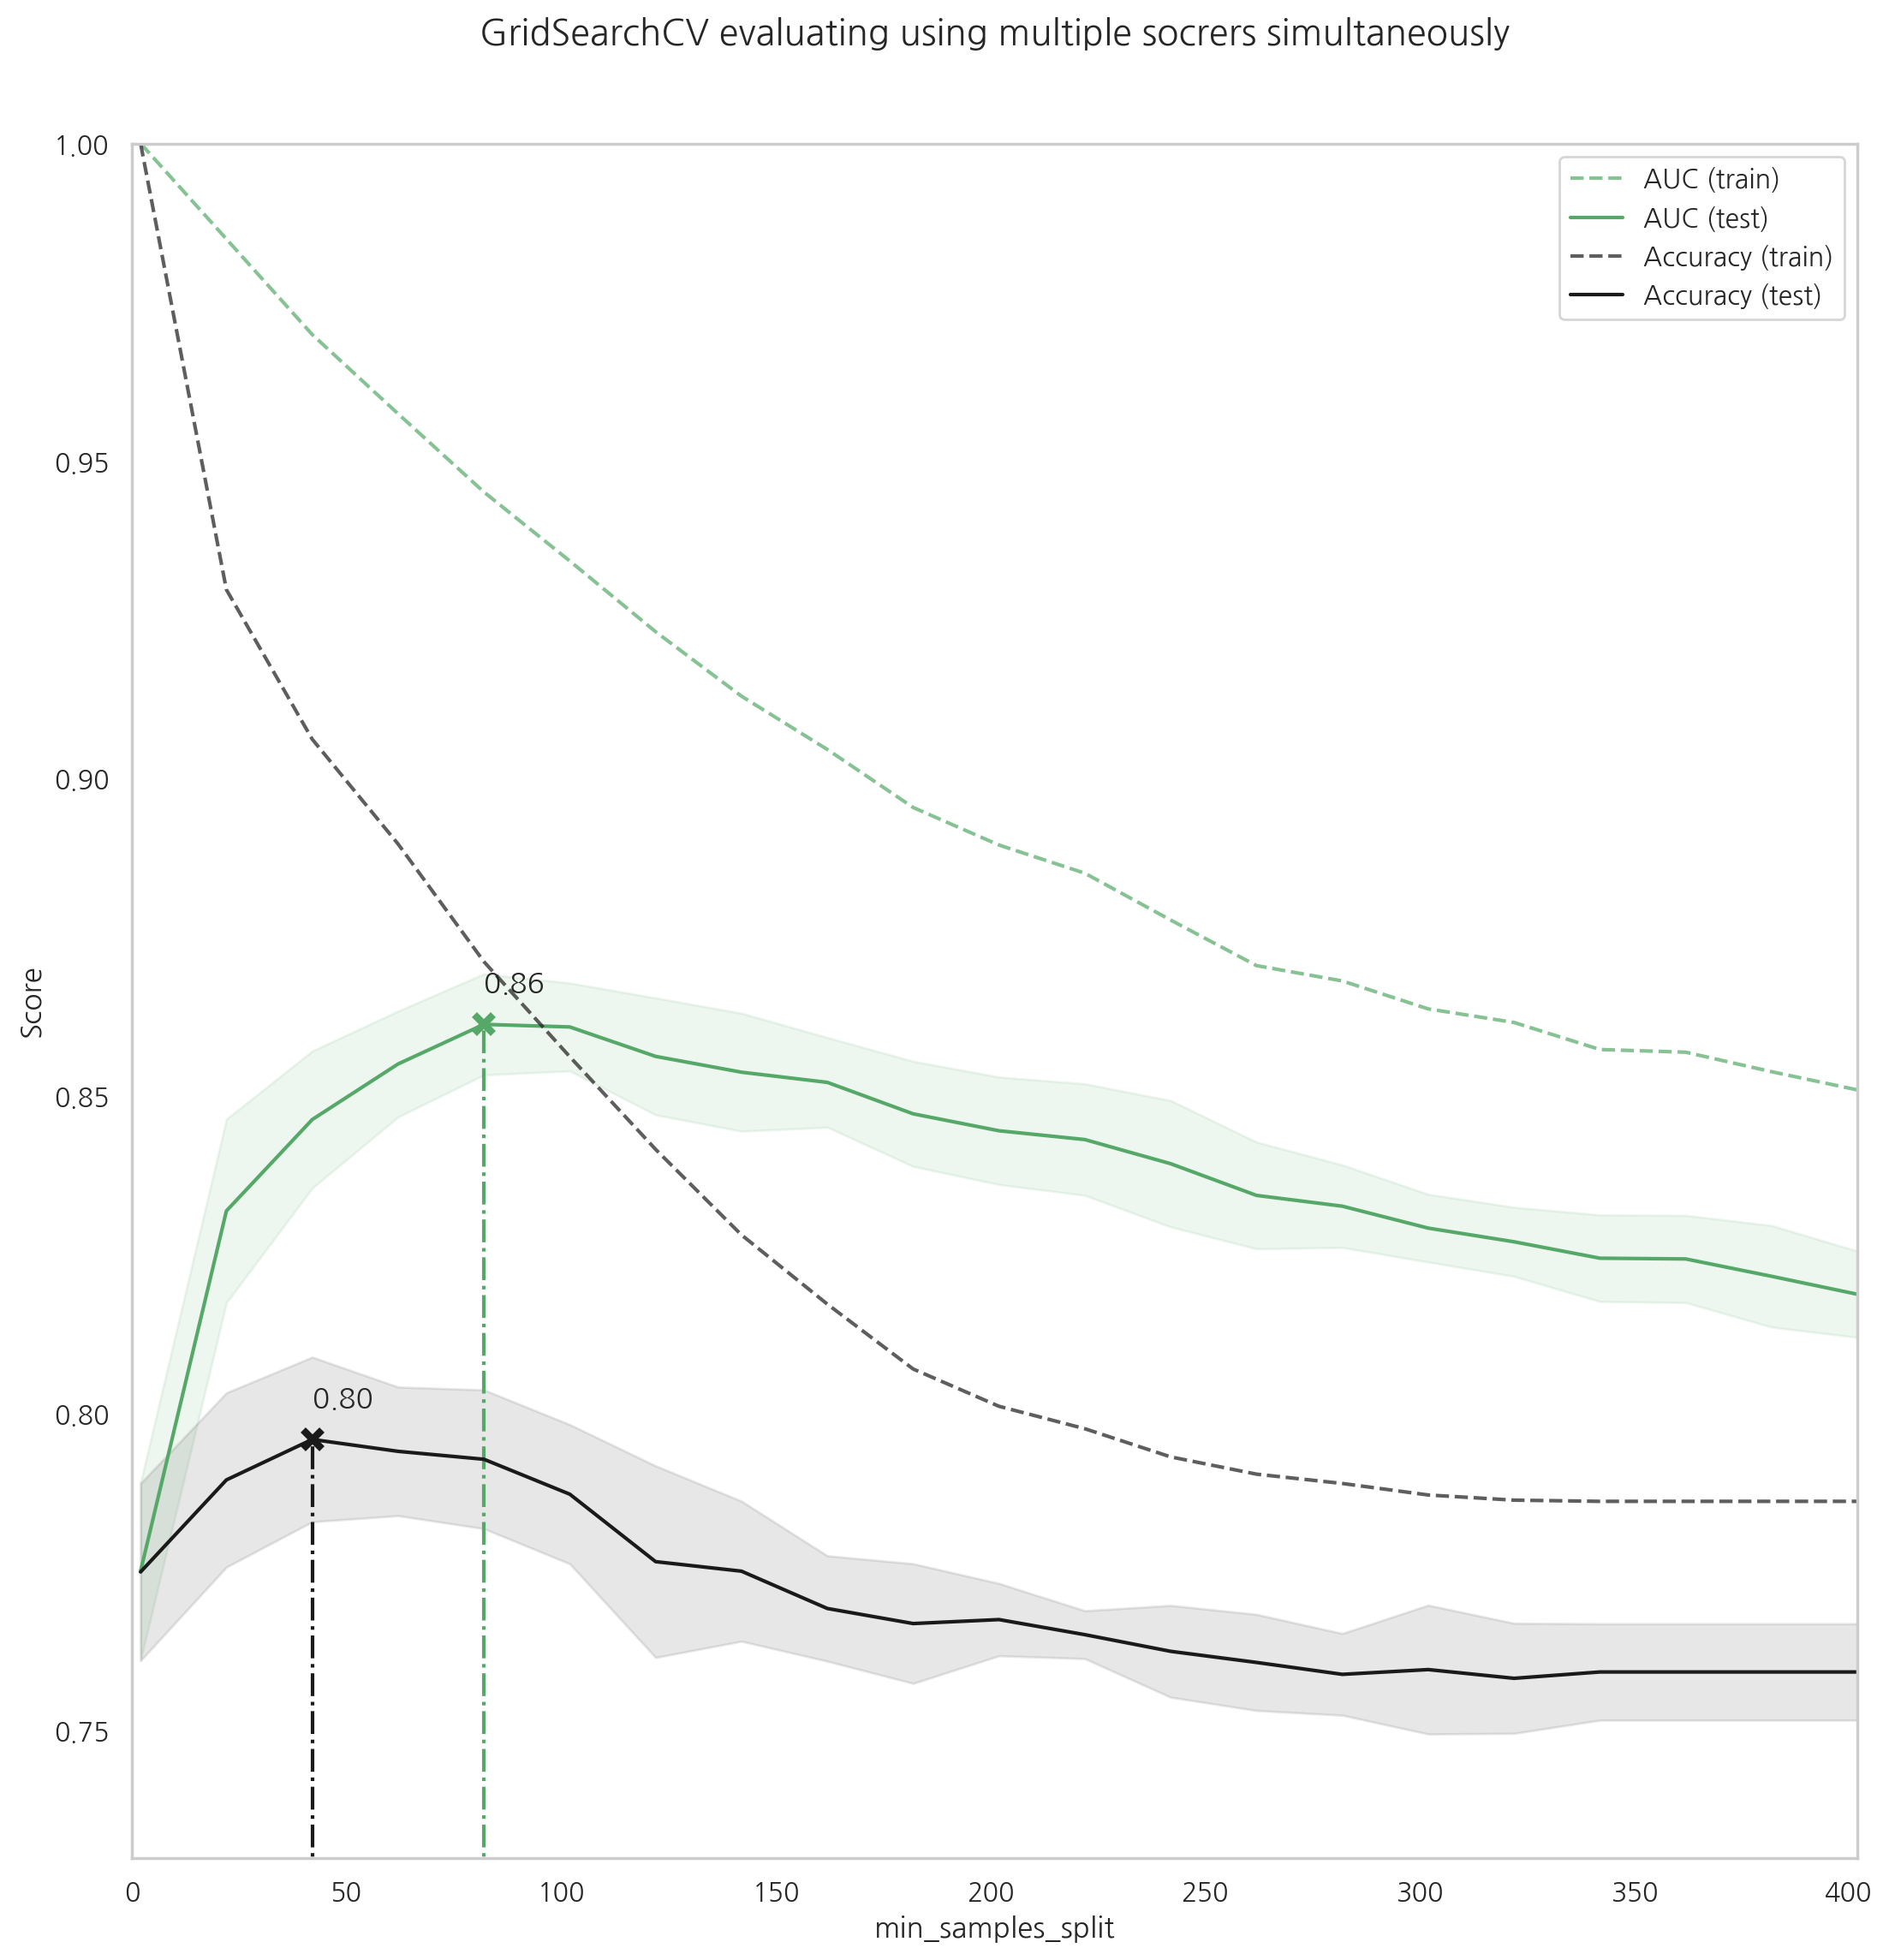

In [67]:
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple socrers simultaneously", 
         fontsize=15, y=1.05)
plt.xlabel("min_samples_split")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 402)
ax.set_ylim(0.73, 1)

for scorer, color in zip(sorted(scoring), ["g", "k"]) : 
    for sample, style in (("train", "--"), ("test", "-")) :
        sample_score_mean = results["mean_%s_%s" % (sample, scorer)]
        sample_score_std = results["std_%s_%s" % (sample, scorer)]
        ax.fill_between(
            X_axis,
            sample_score_mean - sample_score_std,
            sample_score_mean + sample_score_std,
            alpha=0.1 if sample == "test" else 0, # test score에만 분산영역 표시
            color=color
        )
        ax.plot(
            X_axis,
            sample_score_mean,
            style,
            color=color,
            alpha=1 if sample == "test" else 0.7,
            label="%s (%s)" % (scorer, sample)
        )
    # test score의 best val의 위치 표시 : rank 1
    # np.nonzero() : 0이 아닌 값의 인덱스 반환
    best_index = np.nonzero(results["rank_test_%s" % scorer] == 1)[0][0]
    best_score = results["mean_test_%s" % scorer][best_index]
    
    ax.plot(
        [X_axis[best_index]] * 2, # [82.0, 82.0]
        [0, best_score],
        linestyle="-.",
        color=color,
        marker="x",
        markeredgewidth=3,
        ms=8
    )
    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))
    
plt.legend(loc="best")
plt.grid(False)
plt.show() ; 

In [28]:
scoring

{'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

In [26]:
sorted(scoring)

['AUC', 'Accuracy']

In [27]:
for scorer, color in zip(sorted(scoring), ["g", "k"]) : 
    print(scorer, color)

AUC g
Accuracy k


In [60]:
results["mean_train_AUC"]

array([1.        , 0.98494245, 0.96989477, 0.95741781, 0.94509394,
       0.93423257, 0.92308868, 0.9129394 , 0.90454738, 0.89541026,
       0.88949818, 0.88505699, 0.8776788 , 0.87050212, 0.8680883 ,
       0.8636847 , 0.8615497 , 0.85728994, 0.85686386, 0.85379468,
       0.85092347])

In [66]:
[X_axis[4]] * 2

[82.0, 82.0]

### np.nonzero()
- 0이 아닌 요소의 행 인덱스와 열 인덱스를 반환해준다.

In [44]:
test_arr = np.array([[1, 0, 3], [4, 0, 6]])
test_arr

array([[1, 0, 3],
       [4, 0, 6]])

In [45]:
np.nonzero(test_arr)

(array([0, 0, 1, 1], dtype=int64), array([0, 2, 0, 2], dtype=int64))

In [40]:
help(np.nonzero)

Help on _ArrayFunctionDispatcher in module numpy:

nonzero(a)
    Return the indices of the elements that are non-zero.
    
    Returns a tuple of arrays, one for each dimension of `a`,
    containing the indices of the non-zero elements in that
    dimension. The values in `a` are always tested and returned in
    row-major, C-style order.
    
    To group the indices by element, rather than dimension, use `argwhere`,
    which returns a row for each non-zero element.
    
    .. note::
    
       When called on a zero-d array or scalar, ``nonzero(a)`` is treated
       as ``nonzero(atleast_1d(a))``.
    
       .. deprecated:: 1.17.0
    
          Use `atleast_1d` explicitly if this behavior is deliberate.
    
    Parameters
    ----------
    a : array_like
        Input array.
    
    Returns
    -------
    tuple_of_arrays : tuple
        Indices of elements that are non-zero.
    
    See Also
    --------
    flatnonzero :
        Return indices that are non-zero in the fl

#### rank 배열에서 특정 값의 인덱스
- rank 배열을 T, F로 변환한뒤
- np.nonzero()를 사용하면
- T의 인덱스를 array로 반환한다.

In [51]:
np.nonzero(results["rank_test_AUC"] == 1)[0][0]

4

#### np.argwhere()
- 0이 아닌 요소의 인덱스

In [48]:
test_arr = np.array([[1, 2, 3, 0, 5], [0, 0, 1, 2, 3]])
np.argwhere(test_arr)

array([[0, 0],
       [0, 1],
       [0, 2],
       [0, 4],
       [1, 2],
       [1, 3],
       [1, 4]], dtype=int64)

### RECALL 성능지표로 테스트

In [72]:
scoring = {"RECALL": "recall", "Accuracy": make_scorer(accuracy_score)}
scoring

{'RECALL': 'recall', 'Accuracy': make_scorer(accuracy_score)}

In [74]:
gs2 = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid={"min_samples_split": range(2, 403, 20)},
    refit="RECALL",
    scoring=scoring,
    n_jobs=2,
    return_train_score=True
)

gs2.fit(X, y)
gs2_df = pd.DataFrame(gs2.cv_results_)
gs2_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_min_samples_split', 'params', 'split0_test_RECALL',
       'split1_test_RECALL', 'split2_test_RECALL', 'split3_test_RECALL',
       'split4_test_RECALL', 'mean_test_RECALL', 'std_test_RECALL',
       'rank_test_RECALL', 'split0_train_RECALL', 'split1_train_RECALL',
       'split2_train_RECALL', 'split3_train_RECALL', 'split4_train_RECALL',
       'mean_train_RECALL', 'std_train_RECALL', 'split0_test_Accuracy',
       'split1_test_Accuracy', 'split2_test_Accuracy', 'split3_test_Accuracy',
       'split4_test_Accuracy', 'mean_test_Accuracy', 'std_test_Accuracy',
       'rank_test_Accuracy', 'split0_train_Accuracy', 'split1_train_Accuracy',
       'split2_train_Accuracy', 'split3_train_Accuracy',
       'split4_train_Accuracy', 'mean_train_Accuracy', 'std_train_Accuracy'],
      dtype='object')

In [103]:
X_axis = np.array([s["min_samples_split"] for s in results["params"]])
X_axis

array([  2,  22,  42,  62,  82, 102, 122, 142, 162, 182, 202, 222, 242,
       262, 282, 302, 322, 342, 362, 382, 402])

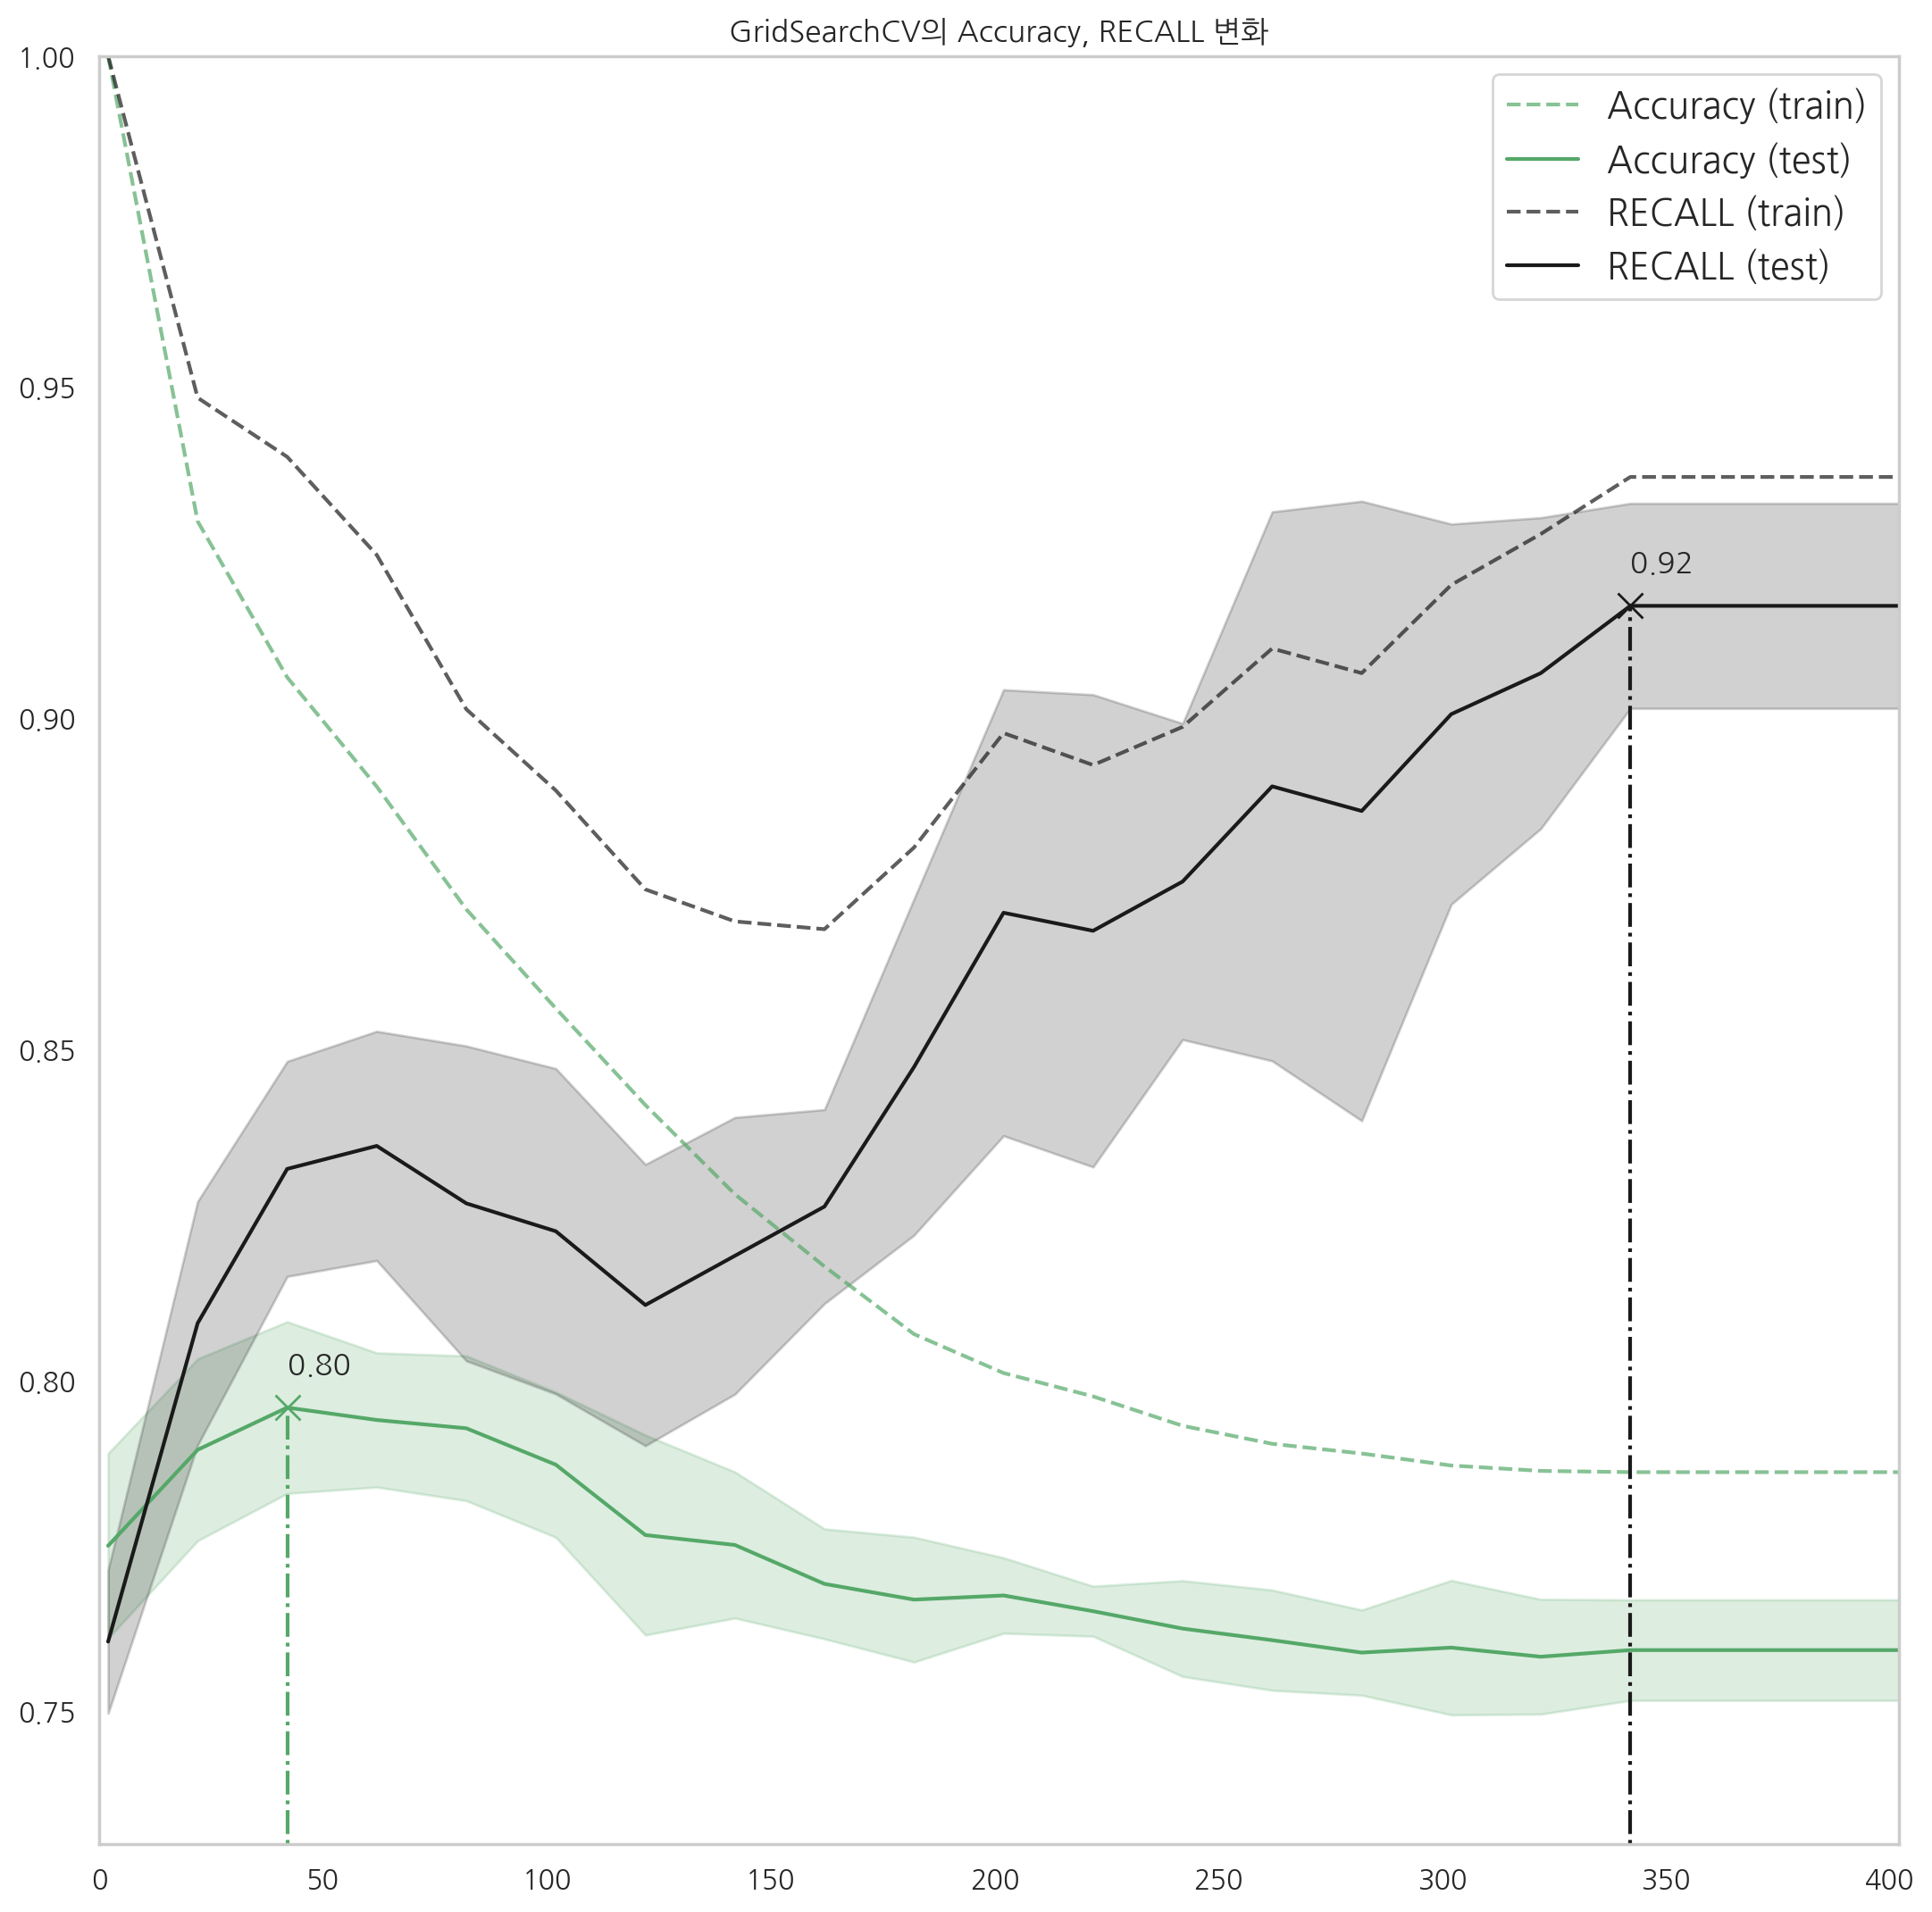

In [139]:
plt.figure(figsize=(13, 13))
ax = plt.gca()

for scorer, color in zip(sorted(scoring), ["g", "k"]) : 
    for sample, style in (("train", "--"), ("test", "-")) : 
        sample_score_mean = results["mean_%s_%s" % (sample, scorer)]
        sample_score_std = results["std_%s_%s" % (sample, scorer)]
        
        ax.fill_between(
            X_axis,
            sample_score_mean - sample_score_std,
            sample_score_mean + sample_score_std,
            color=color,
            linestyle=style,
            alpha=0.2 if sample == "test" else 0.0)
        ax.plot(
            X_axis,
            sample_score_mean,
            color=color,
            linestyle=style,
            alpha=1.0 if sample == "test" else 0.7,
            label="%s (%s)" % (scorer, sample))
        
        best_index = np.nonzero(results["rank_test_%s" % (scorer)]==1)[0][0]
        best_score = results["mean_test_%s" % (scorer)][best_index]
    
    ax.plot(
        [X_axis[best_index]] * 2,
        [0, best_score],
        marker="x",
        color=color,
        linestyle="-.",
        ms=10)
    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))

plt.xlim(0, 402)
plt.ylim(0.73, 1.0)
plt.legend(loc="best", fontsize="large")
plt.grid(False)
plt.title("GridSearchCV의 Accuracy, RECALL 변화")
plt.show() ;         

## Nested vs Non-Nested cv test
- Nested CV (중첩 CV) 는 하이퍼파라미터 튜닝이 필요한 모델에 사용 된다.
   - GridSearchCV()를 그냥 사용할 떄와 다시한번 cross_val_score에 사용할 때의 차이
   - non-nested 모델을 사용하는 경우 과적합이 발생할 수 있다.

In [147]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.svm import SVC

In [148]:
iris = load_iris()
X = iris.data
y = iris.target

In [149]:
num_trials = 30
non_nested_scores = np.zeros(num_trials)
nested_scores = np.zeros(num_trials)

In [150]:
non_nested_scores[:5]

array([0., 0., 0., 0., 0.])

In [151]:
nested_scores[:5]

array([0., 0., 0., 0., 0.])

In [163]:
p_grid = {"C": [1, 10, 100], "gamma": [0.01, 0.1]}
svm = SVC(kernel="rbf")

for i in range(num_trials) : 
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    
    # non-nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    clf.fit(X, y)
    non_nested_scores[i] = clf.best_score_
    
    # nested CV scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    nested_score = cross_val_score(clf, X, y, cv=outer_cv)
    nested_scores[i] = nested_score.mean()
    
    score_difference = non_nested_scores - nested_scores
    
print("avg diff of {:.6f} with std. dev. of {:.6f}.".format(
    score_difference.mean(), score_difference.std())
     )

avg diff of 0.007581 with std. dev. of 0.007833.


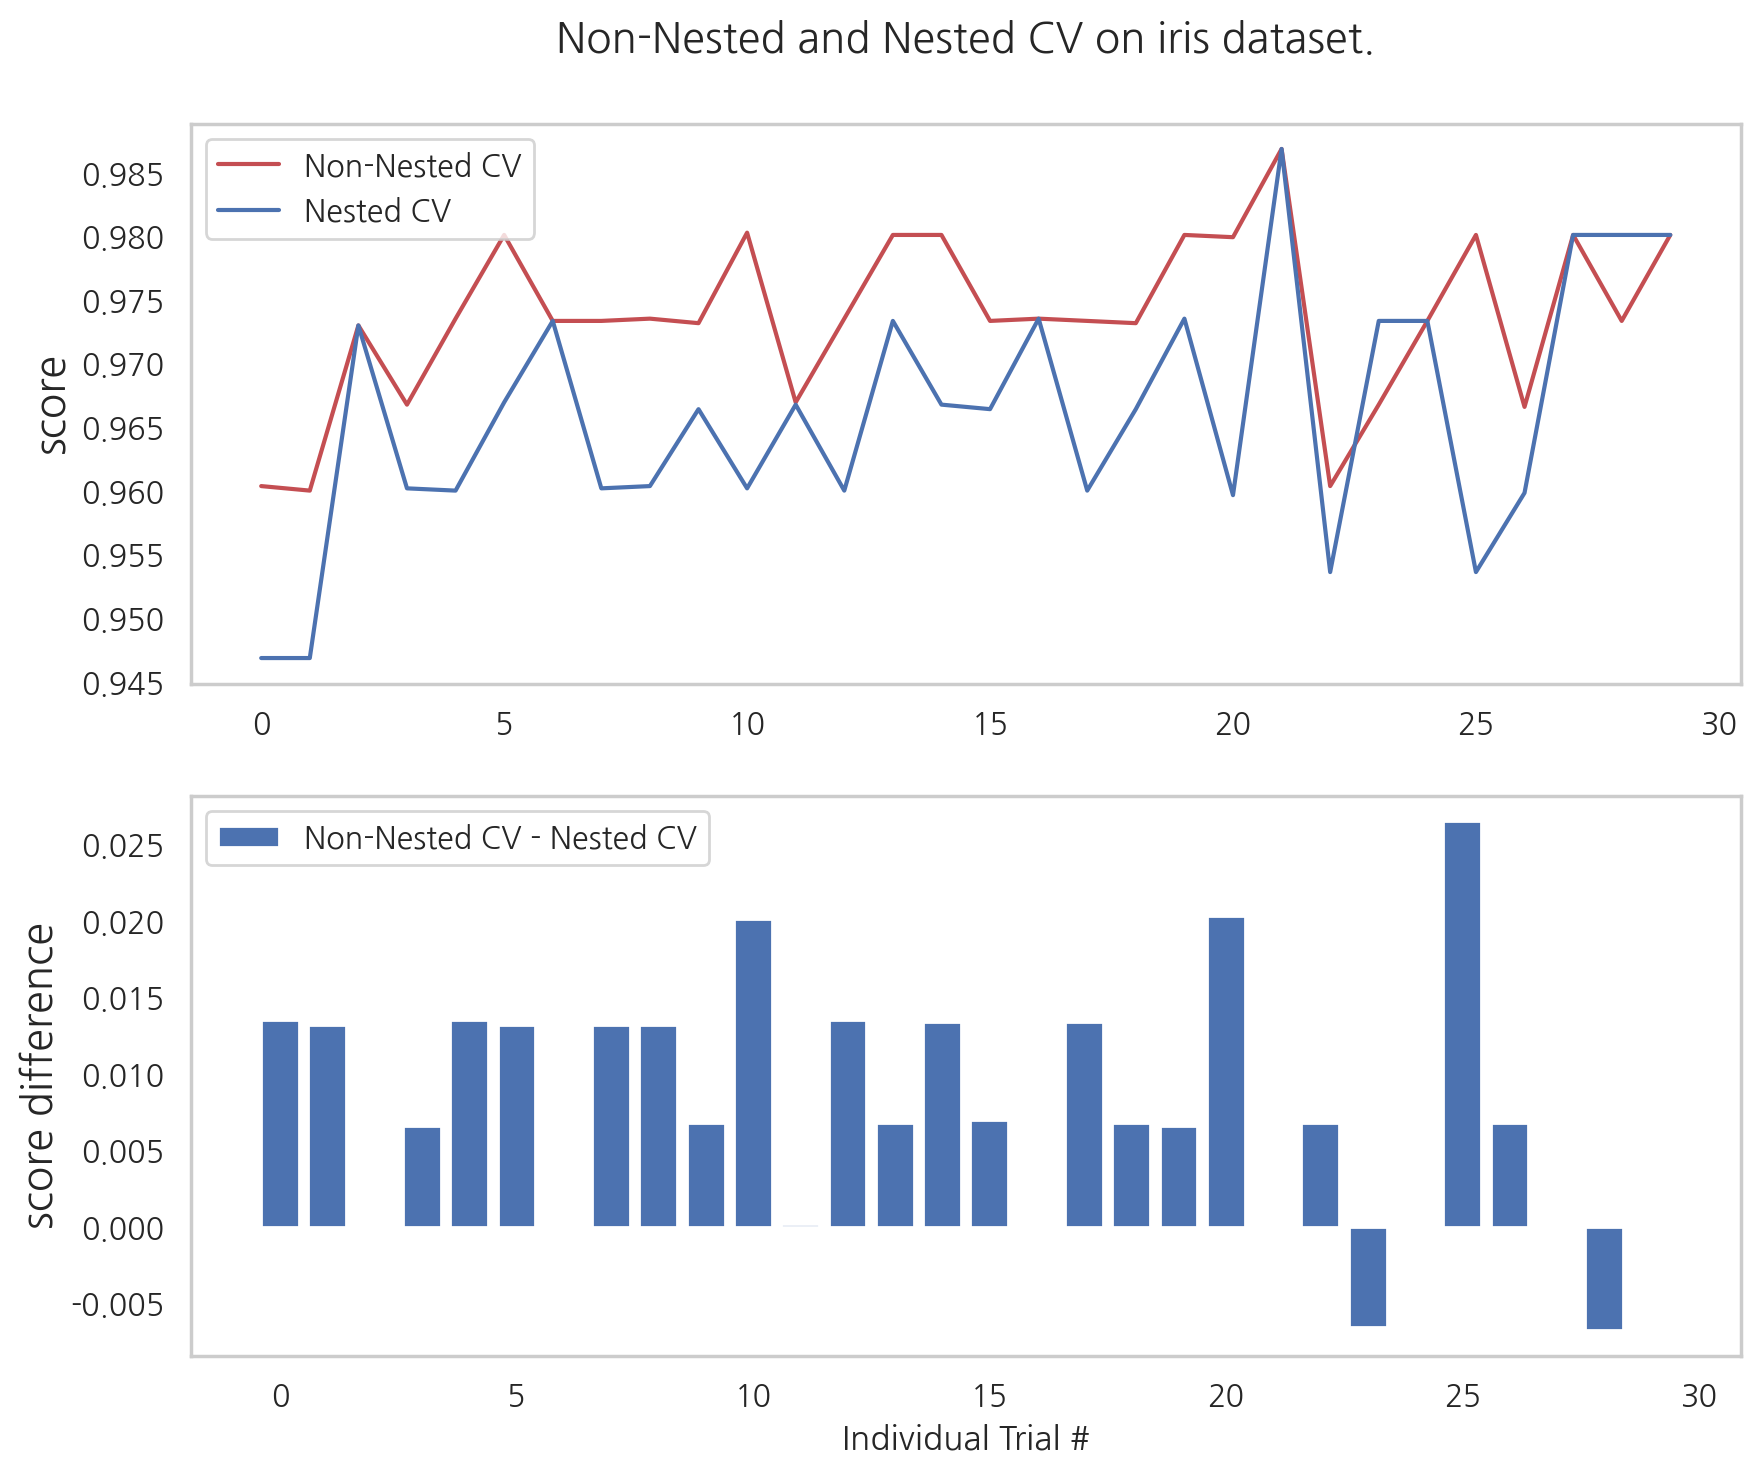

In [162]:
plt.figure(figsize=(10, 8))

plt.subplot(211)
# plot 을 변수에 저장하고 legend에서 이 변수를 그대로 사용
(non_nested_scores_line, ) = plt.plot(non_nested_scores, color="r")
(nested_line, ) = plt.plot(nested_scores, color="b")
plt.ylabel("score", fontsize=15)
plt.legend(
    [non_nested_scores_line, nested_line],
    ["Non-Nested CV", "Nested CV"],
    loc="upper left"
)
plt.title("Non-Nested and Nested CV on iris dataset.",
          x=0.5, 
          y=1.1,
          fontsize=15
)
plt.grid(False)

plt.subplot(212)
# plot을 변수에 저장하고 이 변수를 legend에서 그대로 사용
difference_plot = plt.bar(range(num_trials), score_difference)
plt.xlabel("Individual Trial #")
plt.ylabel("score difference", fontsize=15)
plt.legend(
    [difference_plot],
    ["Non-Nested CV - Nested CV"],
    loc="upper left"
)
plt.grid(False)
plt.show() ; 

## retry

In [30]:
from sklearn.datasets import make_hastie_10_2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [32]:
X, y = make_hastie_10_2(n_samples=8000, random_state=30)

scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}
gs_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid={"min_samples_split": range(2, 403, 20)},
    scoring=scoring,
    refit="AUC",
    return_train_score=True,
    n_jobs=2)
gs_dt.fit(X, y)
gs_dt.score(X, y)

0.926073701120112

In [33]:
results = pd.DataFrame(gs_dt.cv_results_)
results.sort_values("rank_test_Accuracy", ascending=True)[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,...,mean_test_Accuracy,std_test_Accuracy,rank_test_Accuracy,split0_train_Accuracy,split1_train_Accuracy,split2_train_Accuracy,split3_train_Accuracy,split4_train_Accuracy,mean_train_Accuracy,std_train_Accuracy
2,0.276197,0.008032,0.003406,0.000501,42,{'min_samples_split': 42},0.858286,0.841519,0.842680,0.823208,...,0.791375,0.009035,1,0.890938,0.895156,0.905469,0.900625,0.897969,0.898031,0.004912
3,0.269597,0.007664,0.002994,0.000010,62,{'min_samples_split': 62},0.853406,0.849057,0.852103,0.829417,...,0.788625,0.009172,2,0.874844,0.875156,0.888125,0.881250,0.887031,0.881281,0.005637
4,0.248010,0.012477,0.002798,0.000399,82,{'min_samples_split': 82},0.862339,0.855044,0.852431,0.828263,...,0.787750,0.008737,3,0.858437,0.865156,0.873750,0.868125,0.872031,0.867500,0.005433
5,0.248803,0.013807,0.002798,0.000408,102,{'min_samples_split': 102},0.863364,0.865305,0.853449,0.828057,...,0.784750,0.009028,4,0.843281,0.848750,0.855781,0.856250,0.858125,0.852438,0.005577
6,0.237615,0.012017,0.002398,0.000484,122,{'min_samples_split': 122},0.859153,0.873506,0.857506,0.825677,...,0.784375,0.012575,5,0.833281,0.837031,0.843906,0.848750,0.843281,0.841250,0.005454


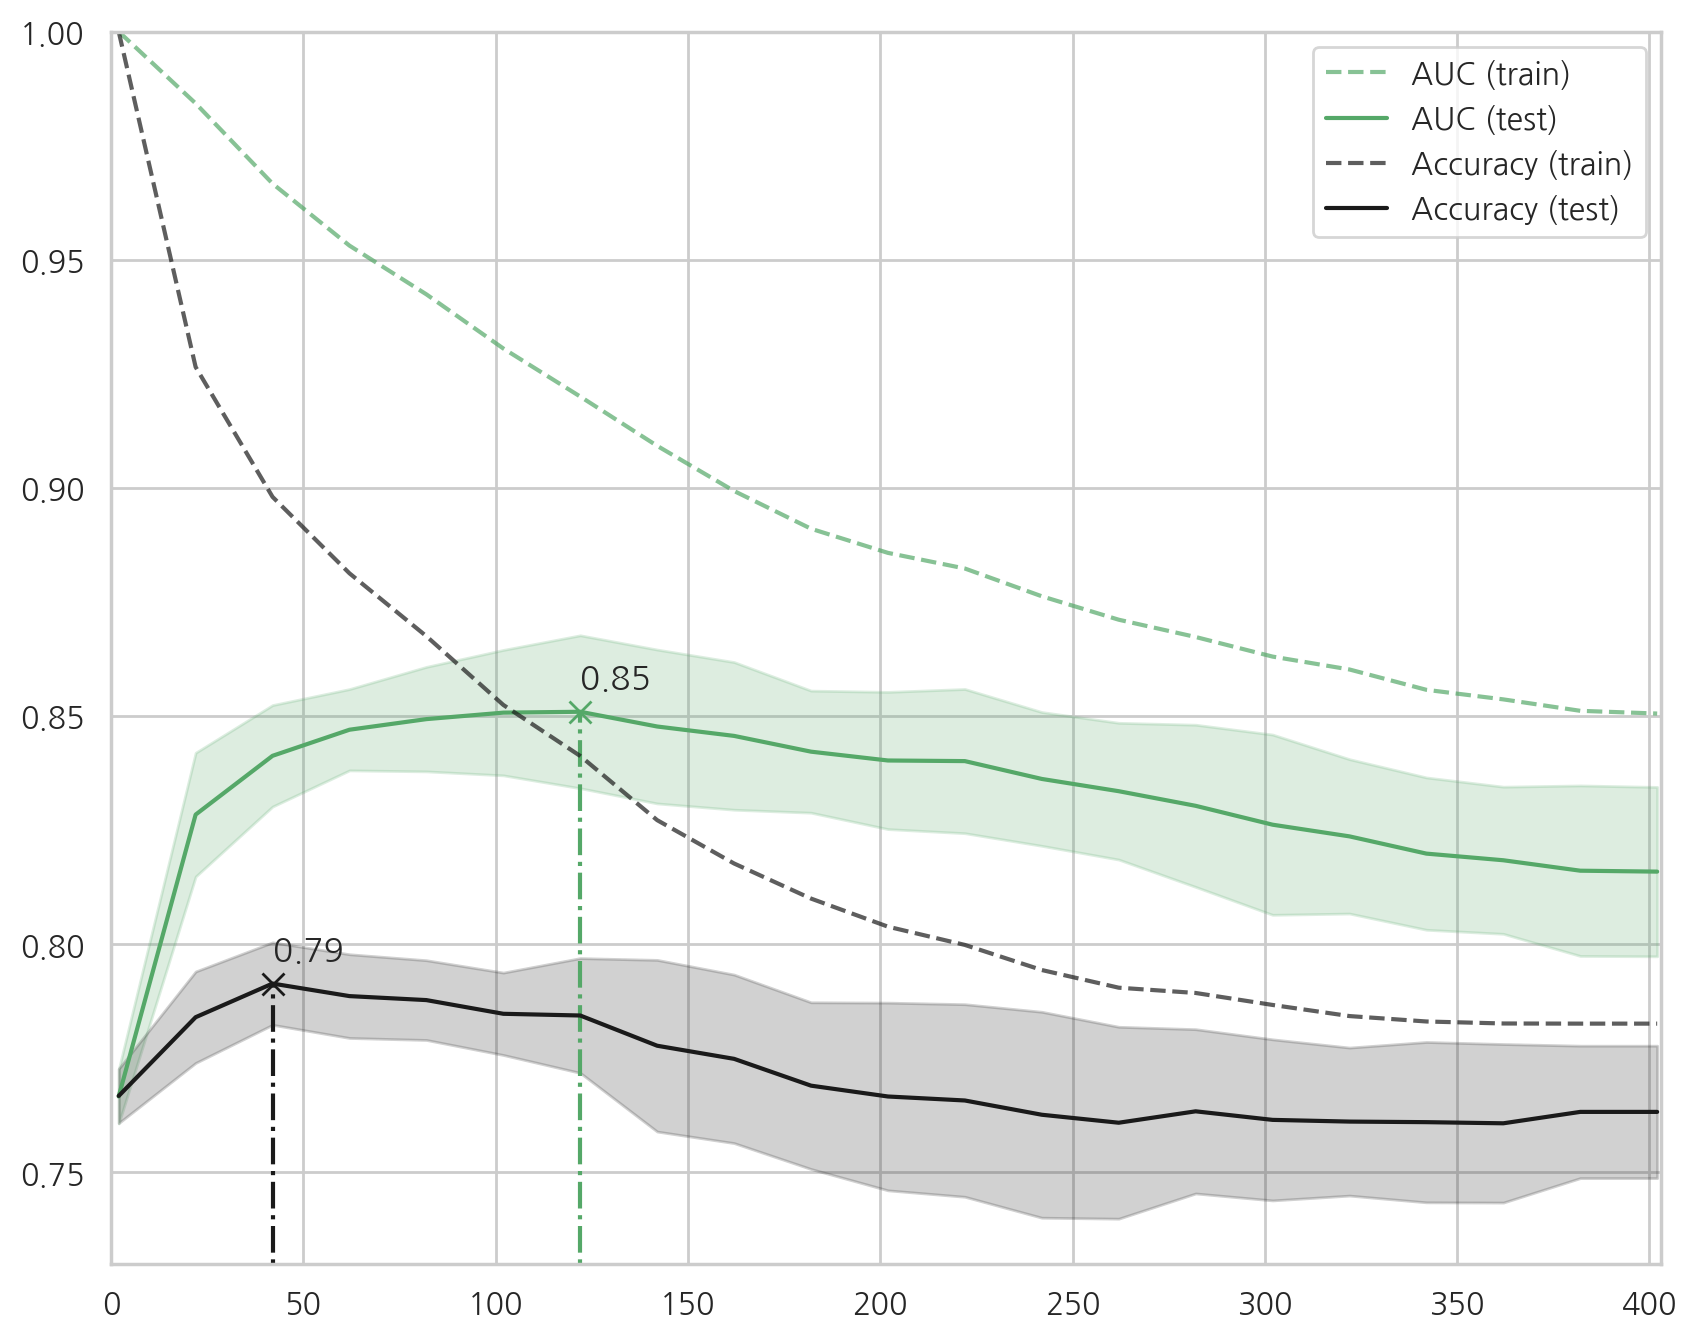

In [31]:
plt.figure(figsize=(10, 8))
X_axis = np.array(results["param_min_samples_split"], dtype=float)
ax = plt.gca()

for scorer, color in zip(sorted(scoring), ["g", "k"]) : 
    for sample, style in (("train", "--"), ("test", "-")) : 
        sample_score_mean = results["mean_%s_%s" % (sample, scorer)]
        sample_score_std = results["std_%s_%s" % (sample, scorer)]
        ax.fill_between(
            X_axis,
            sample_score_mean - sample_score_std,
            sample_score_mean + sample_score_std,
            color=color,
            linestyle=style,
            alpha=0.2 if sample == "test" else 0.0)
        ax.plot(
            X_axis,
            sample_score_mean,
            color=color,
            linestyle=style,
            alpha=1.0 if sample == "test" else 0.7,
            label="%s (%s)" % (scorer, sample))
    best_index = np.nonzero(results["rank_test_%s" % (scorer)] == 1)[0][0]
    best_score = results["mean_test_%s" % (scorer)][best_index]
    ax.plot(
        [X_axis[best_index]] * 2,
        [0, best_score],
        color=color,
        linestyle="-.",
        marker="x",
        ms=8)
    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))
    
plt.xlim(0, 403)
plt.ylim(0.73, 1.0)    
plt.legend(loc="best")
plt.show() ; 

In [37]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

In [36]:
iris = load_iris()
X = iris.data
y = iris.target

X.shape, y.shape

((150, 4), (150,))

In [50]:
svm = SVC(random_state=32)
param_grid = {"gamma": [0.01, 0.1, 1.0, 10, 100], "C": [0.01, 0.1, 1.0, 10, 100]}

inner_cv_scores = np.zeros(30)
outer_cv_scores = np.zeros(30)

for i in range(30) : 
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    clf = GridSearchCV(estimator=svm, param_grid=param_grid, scoring="accuracy", cv=inner_cv).fit(X, y)
    
    clf_2 = GridSearchCV(estimator=svm, param_grid=param_grid, scoring="accuracy", cv=inner_cv)
    cv = cross_val_score(clf_2, X, y, scoring="accuracy", cv=outer_cv)
    
    inner_cv_scores[i] = clf.best_score_
    outer_cv_scores[i] = cv.mean()

In [51]:
inner_cv_scores

array([0.96034851, 0.95999289, 0.97297297, 0.96674964, 0.9735064 ,
       0.98008535, 0.97332859, 0.9735064 , 0.9735064 , 0.97315078,
       0.98026316, 0.96692745, 0.9735064 , 0.98008535, 0.98008535,
       0.97332859, 0.9735064 , 0.97332859, 0.97315078, 0.98008535,
       0.97990754, 0.98684211, 0.96034851, 0.96674964, 0.97332859,
       0.98008535, 0.96657183, 0.98008535, 0.9735064 , 0.98008535])

In [52]:
outer_cv_scores

array([0.95341394, 0.94683499, 0.97297297, 0.95341394, 0.9601707 ,
       0.96674964, 0.97332859, 0.9601707 , 0.96034851, 0.96639403,
       0.9601707 , 0.96674964, 0.95341394, 0.97332859, 0.96674964,
       0.97297297, 0.9735064 , 0.95999289, 0.96639403, 0.9735064 ,
       0.94647937, 0.98684211, 0.95359175, 0.96674964, 0.95981508,
       0.95359175, 0.95981508, 0.9735064 , 0.98008535, 0.9735064 ])

In [58]:
diff_scores = inner_cv_scores - outer_cv_scores 
diff_scores

array([ 0.00693457,  0.01315789,  0.        ,  0.0133357 ,  0.0133357 ,
        0.0133357 ,  0.        ,  0.0133357 ,  0.01315789,  0.00675676,
        0.02009246,  0.00017781,  0.02009246,  0.00675676,  0.0133357 ,
        0.00035562,  0.        ,  0.0133357 ,  0.00675676,  0.00657895,
        0.03342817,  0.        ,  0.00675676,  0.        ,  0.01351351,
        0.0264936 ,  0.00675676,  0.00657895, -0.00657895,  0.00657895])

In [73]:
dir(plt)

['AbstractContextManager',
 'Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Enum',
 'ExitStack',
 'Figure',
 'FigureBase',
 'FigureCanvasBase',
 'FigureManagerBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'TYPE_CHECKING',
 'Text',
 'TickHelper',
 'Widget',
 '_REPL_DISPLAYHOOK',
 '_ReplDisplayHook',
 '__annotations__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_color_sequences',
 '_colormaps',
 '_copy_docstring_and_deprecators

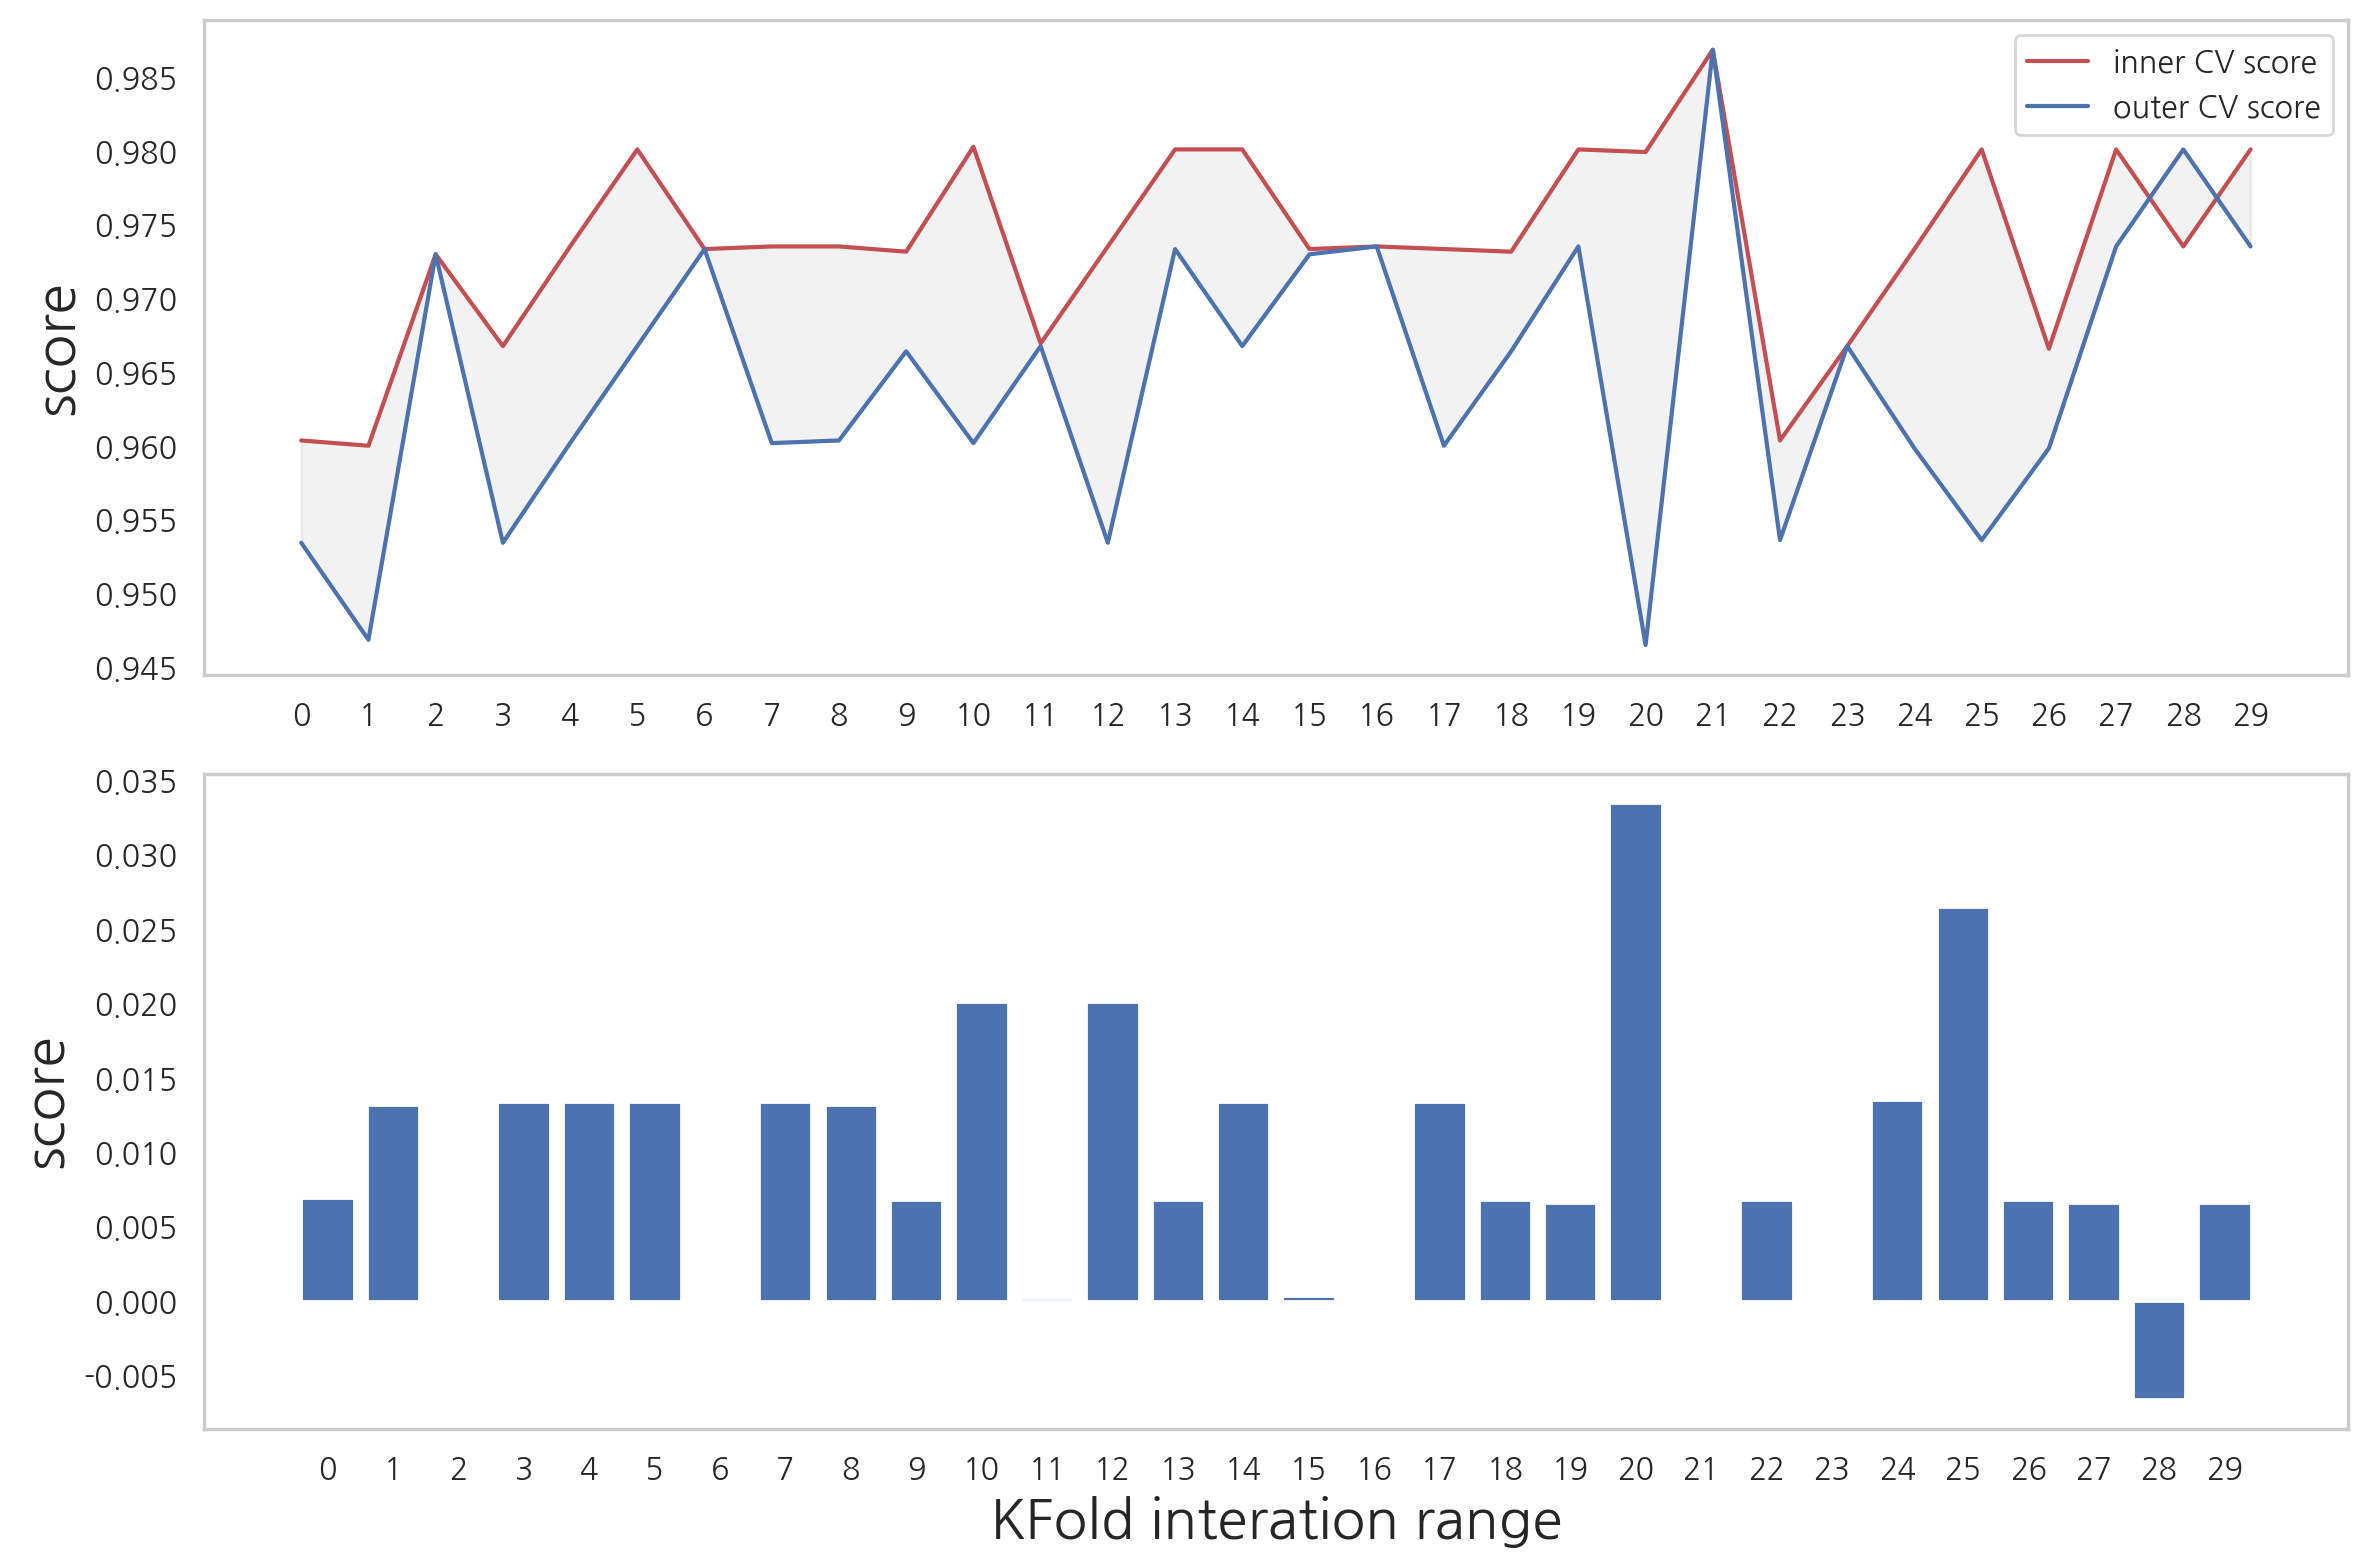

In [99]:
plt.figure(figsize=(12, 8))

plt.subplot(211)
plt.plot(inner_cv_scores, color="r", label="inner CV score")
plt.plot(outer_cv_scores, color="b", label="outer CV score")
plt.fill_between(range(30), inner_cv_scores, outer_cv_scores, alpha=0.1, color="gray")
plt.xticks(range(30), range(30))
plt.ylabel("score", fontsize=20)
plt.grid(False)
plt.legend(loc="best")

plt.subplot(212)
plt.bar(range(30), diff_scores)
plt.xticks(range(30), range(30))
plt.xlabel("KFold interation range", fontsize=20)
plt.ylabel("score", fontsize=20)
plt.grid(False)


plt.tight_layout()
plt.show() ; 

## PCA를 사용한 모델 복잡성의 균형과 CV score
- PCA의 n_components를 최소화하면서 정확도 1의 표준편차 내에서 적절한 정확도를 찾는다.

In [100]:
from sklearn.datasets import load_digits

In [101]:
X, y = load_digits(return_X_y=True)

X.shape, y.shape

((1797, 64), (1797,))

In [104]:
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [122]:
def lower_bound(cv_results) : 
    
    # 표준편차 계산 : best score - std score
    best_score_idx = np.argmax(cv_results["mean_test_score"])
    
    return (
        cv_results["mean_test_score"][best_score_idx] \
        - cv_results["std_test_score"][best_score_idx]
    )

In [132]:
def best_low_complexity(cv_results) : 
    
    # 표준편차 계산
    threshold = lower_bound(cv_results)
    # 0이 아닌 것의 인덱스를 array 객체로 반환 : np.nonzero()는 flat하지 않음
    candidate_idx = np.flatnonzero(cv_results["mean_test_score"] >= threshold)
    # 표준편차보다 큰 score에 해당하는 것중 가장 작은 n_comp
    best_pca = candidate_idx[
        cv_results["param_pca__n_components"][candidate_idx].argmin()
    ]
    
    return best_pca

In [188]:
%%time

pipe = Pipeline([
    ("pca", PCA(random_state=42)),
    ("clf", LinearSVC(random_state=42, C=0.01, dual="auto"))
])
p_grid = {"pca__n_components": [i for i in range(6, 15) if (i %2 == 0)]}
gs = GridSearchCV(
    estimator=pipe, 
    param_grid=p_grid, 
    scoring="accuracy",
    n_jobs=1,
    refit=best_low_complexity,
    cv=10)
gs.fit(X, y)

CPU times: total: 4.61 s
Wall time: 1.31 s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                       ('clf',
                                        LinearSVC(C=0.01, dual='auto',
                                                  random_state=42))]),
             n_jobs=1, param_grid={'pca__n_components': [6, 8, 10, 12, 14]},
             refit=<function best_low_complexity at 0x000001AEA4095BD0>,
             scoring='accuracy')

In [210]:
pd.DataFrame(gs.cv_results_)[["param_pca__n_components", "mean_test_score", 
                             "std_test_score", "rank_test_score"]]

,param_pca__n_components,mean_test_score,std_test_score,rank_test_score
0,6,0.774603,0.036048,5
1,8,0.845323,0.043501,4
2,10,0.878132,0.037875,3
3,12,0.901462,0.040131,2
4,14,0.910934,0.038587,1


### lower_bound 함수와 best_low_complexity 함수
- 가장 큰 점수의 표준편차를 구하고
- 이 표준편차보다 큰 점수를 모두 찾아서 인덱스를 반환한다.
- 이 인덱스에 해당하는 n_comp들 중에서 가장 작은 것의 인덱스를 다시 반환한다.
- 다시 이 인덱스에 해당하는 점수를 찾는다. 
- 즉 좋은 모델의 기준으로 가장 큰 점수의 표준편차를 설정하고, 이 값보다 큰 점수들 중 가장 작은 PCA n_compoenet와 이에 해당하는 점수를 찾는 것

In [200]:
temp_thr = lower_bound(gs.cv_results_)
temp_thr

0.8723472134756614

In [203]:
bigger_score_temp_thr = np.flatnonzero(gs.cv_results_["mean_test_score"] >= temp_thr)
bigger_score_temp_thr

array([2, 3, 4], dtype=int64)

In [208]:
lowest_n_comp = gs.cv_results_["param_pca__n_components"]\
                              [bigger_score_temp_thr].argmin()
lowest_n_comp

0

In [220]:
print(
    "표준편자 보다 큰 값중 가장 안정적인 pca에 해당하는 점수의 인덱스 : %.f\n"
    "GCV의 refit 파라미터로 설정한 best_low_complexity 함수의 반환값 : %.f" 
    % (bigger_score_temp_thr[lowest_n_comp], gs.best_index_))

표준편자 보다 큰 값중 가장 안정적인 pca에 해당하는 점수의 인덱스 : 2
GCV의 refit 파라미터로 설정한 best_low_complexity 함수의 반환값 : 2


the best index : 2
the n_comp selected : 10
the corresponding acc : 0.878


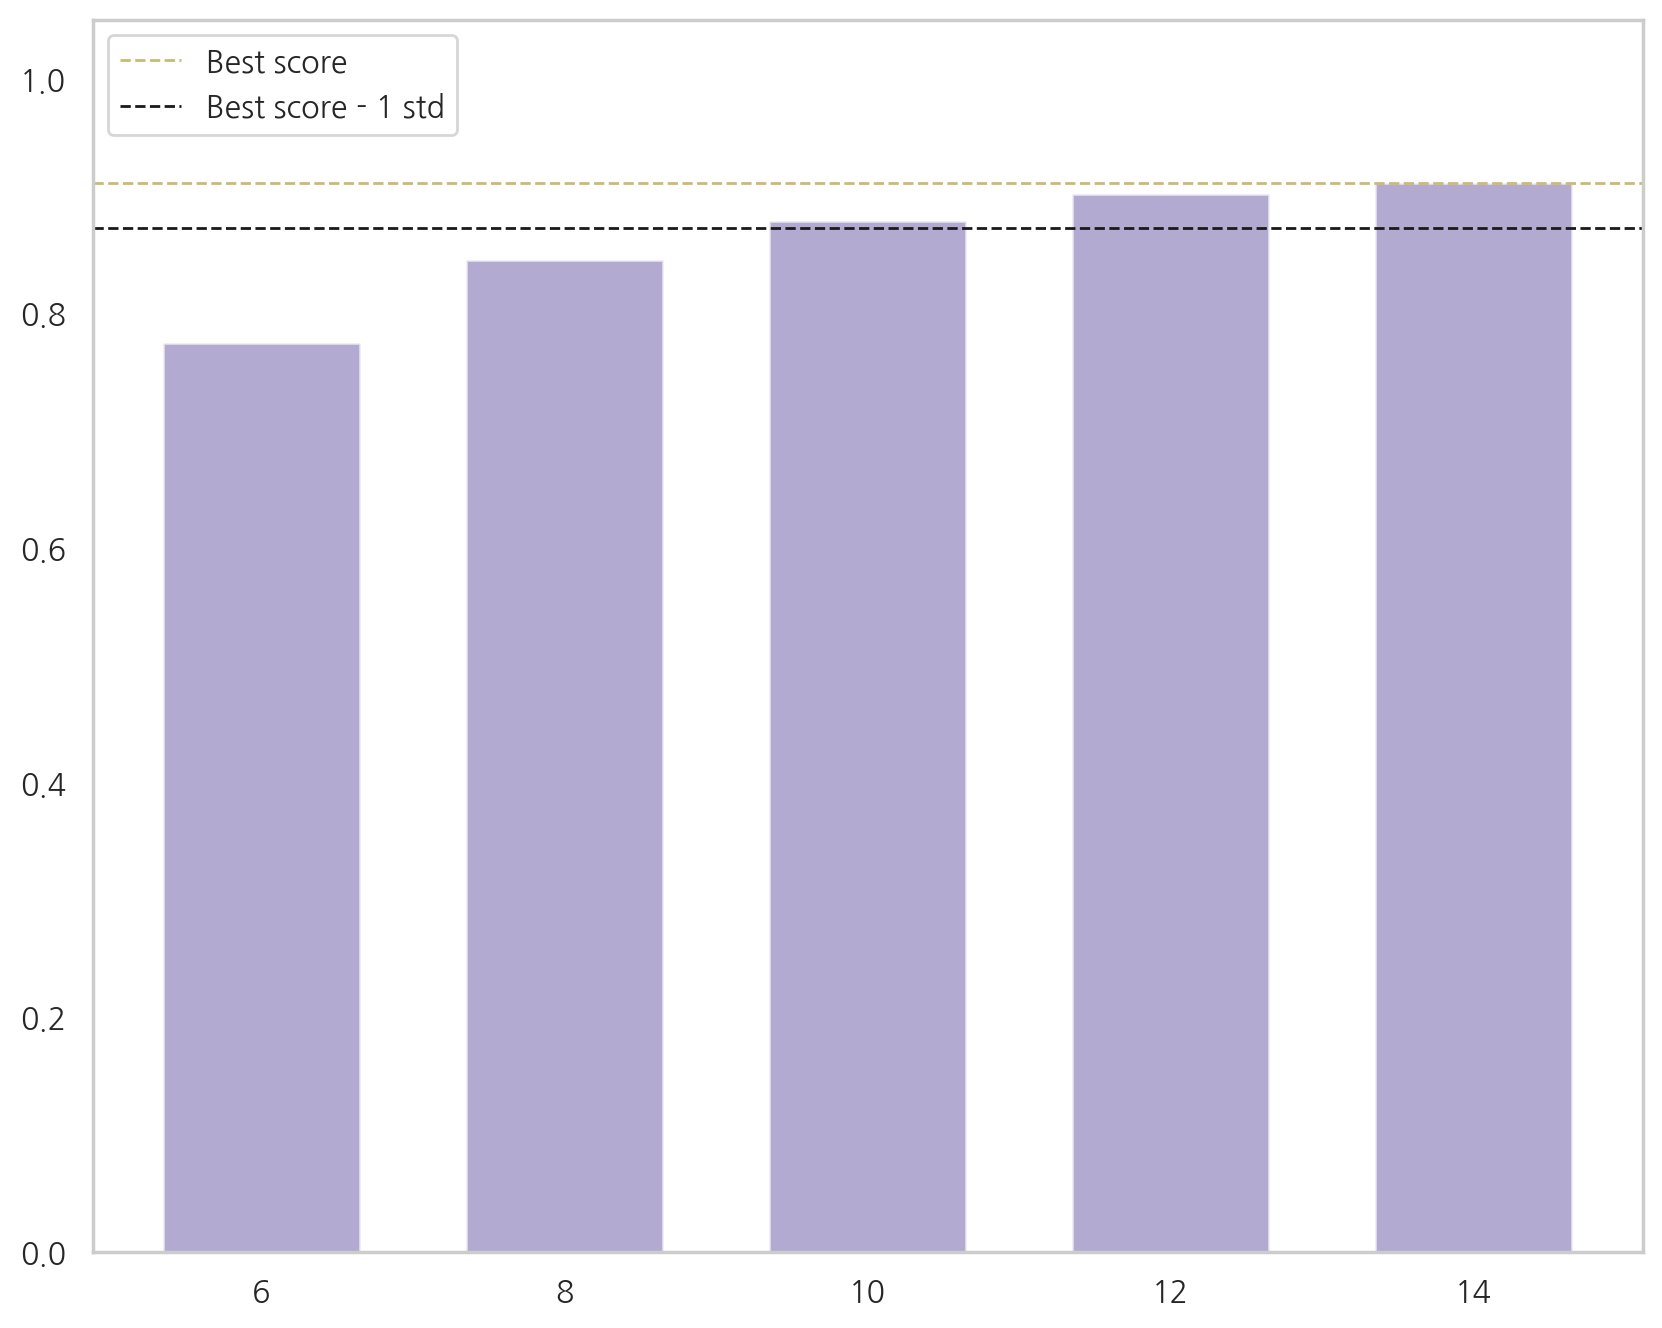

In [211]:
n_comp = gs.cv_results_["param_pca__n_components"]
test_scores = gs.cv_results_["mean_test_score"]

lower = lower_bound(gs.cv_results_)

plt.figure(figsize=(10, 8))
plt.bar(n_comp,  test_scores, width=1.3, color="m", alpha=0.6)
plt.axhline(np.max(test_scores), linestyle="--", color="y", label="Best score", lw=1)
plt.axhline(lower, linestyle="--", color="k", label="Best score - 1 std", lw=1)
plt.xticks(n_comp.tolist())
plt.ylim(0, 1.05)
plt.legend(loc="upper left")
plt.grid(False)

# refit=best_low_complexity
best_index_ = gs.best_index_
print(f"the best index : {best_index_}")
print(f"the n_comp selected : {n_comp[best_index_]}")
print(f"the corresponding acc : {gs.cv_results_['mean_test_score'][best_index_]:.3f}")

plt.show() ; 

In [1]:
from sklearn.datasets import load_digits
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [56]:
X, y = load_digits(return_X_y=True)

In [57]:
def low_bound(cv_results) : 
    
    best_idx = cv_results["mean_test_score"].argmax()
    return cv_results["mean_test_score"][best_idx] - cv_results["std_test_score"][best_idx]

def best_low_complexity(cv_results) : 
    
    thr = low_bound(cv_results)
    candidates = np.flatnonzero(cv_results["mean_test_score"] >= thr)
    n_comp_idx = cv_results["param_pca__n_components"][candidates].argmin()
    best_score_idx = candidates[n_comp_idx]
    
    return best_score_idx
    
pipe = Pipeline([
    ("pca", PCA(random_state=42)),
    ("clf", LinearSVC(random_state=42))
])
p_grid = {
    "pca__n_components": [n for n in range(1, 30) if n %2 == 0]}
gs = GridSearchCV(estimator=pipe, param_grid=p_grid, refit=best_low_complexity, scoring="accuracy", cv=10)
gs.fit(X, y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                       ('clf', LinearSVC(random_state=42))]),
             param_grid={'pca__n_components': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                               20, 22, 24, 26, 28]},
             refit=<function best_low_complexity at 0x00000107EEAE3E20>,
             scoring='accuracy')

In [58]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.272012,0.012715,0.000892,0.000298,2,{'pca__n_components': 2},0.466667,0.461111,0.505556,0.522222,0.516667,0.438889,0.494444,0.497207,0.463687,0.435754,0.480220,0.029552,14
1,0.222800,0.010313,0.000796,0.000398,4,{'pca__n_components': 4},0.716667,0.783333,0.761111,0.694444,0.744444,0.644444,0.800000,0.720670,0.670391,0.715084,0.725059,0.046153,13
2,0.199999,0.009033,0.000801,0.000600,6,{'pca__n_components': 6},0.722222,0.833333,0.738889,0.772222,0.838889,0.727778,0.833333,0.798883,0.703911,0.821229,0.779069,0.049810,12
3,0.170600,0.009892,0.000800,0.000400,8,{'pca__n_components': 8},0.816667,0.866667,0.805556,0.827778,0.816667,0.838889,0.905556,0.910615,0.804469,0.821229,0.841409,0.037438,11
4,0.164299,0.009664,0.001152,0.000321,10,{'pca__n_components': 10},0.894444,0.933333,0.866667,0.850000,0.883333,0.894444,0.905556,0.905028,0.826816,0.888268,0.884789,0.028806,10
5,0.165300,0.014652,0.001100,0.000300,12,{'pca__n_components': 12},0.861111,0.922222,0.911111,0.888889,0.877778,0.944444,0.944444,0.932961,0.837989,0.877095,0.899804,0.034862,8
6,0.171099,0.011844,0.000801,0.000401,14,{'pca__n_components': 14},0.900000,0.950000,0.922222,0.855556,0.866667,0.905556,0.938889,0.927374,0.810056,0.871508,0.894783,0.041234,9
7,0.182500,0.008992,0.000900,0.000539,16,{'pca__n_components': 16},0.916667,0.938889,0.855556,0.905556,0.872222,0.938889,0.950000,0.938547,0.821229,0.893855,0.903141,0.040262,7
8,0.192799,0.011618,0.000902,0.000301,18,{'pca__n_components': 18},0.905556,0.955556,0.855556,0.922222,0.872222,0.950000,0.977778,0.938547,0.854749,0.921788,0.915397,0.040675,4
9,0.197796,0.012930,0.001002,0.000448,20,{'pca__n_components': 20},0.888889,0.961111,0.900000,0.888889,0.894444,0.950000,0.972222,0.927374,0.843575,0.905028,0.913153,0.037359,6


### best score 막대 그래프

In [6]:
%matplotlib inline

In [94]:
# best score 막대만 따로 그리기 위한 scores 편집

def modify_best_scores(cv_results, best_index) : 
    
    mean_scores = cv_results["mean_test_score"].copy()
    mean_scores[best_index] = 0
    
    only_best_score = cv_results["mean_test_score"].copy()
    non_best_index = np.arange(len(n_comp)) != best_index
    only_best_score[non_best_index] = 0
    
    return mean_scores, only_best_score

best scores index : 5
best scores : 0.900
best PCA component : 12


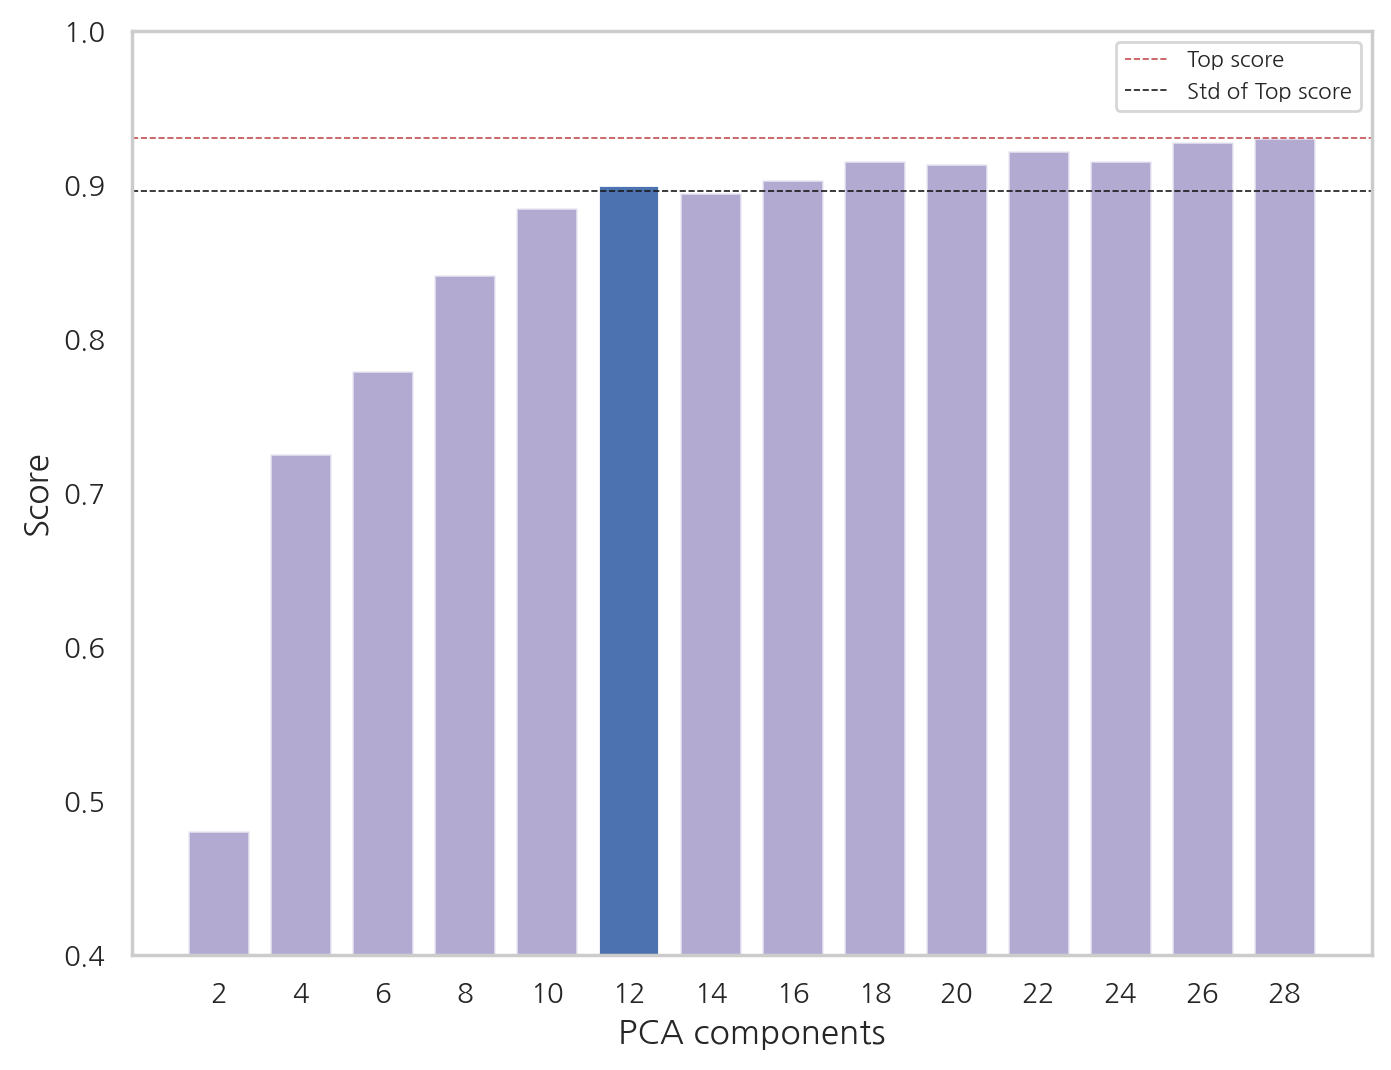

In [95]:
n_comp = gs.cv_results_["param_pca__n_components"]
low_boundary = low_bound(gs.cv_results_)
best_index = gs.best_index_
mean_scores, only_best_score = modify_best_scores(gs.cv_results_, best_index)

plt.figure(figsize=(8, 6))
plt.bar(n_comp, mean_scores, color="m", alpha=0.6, width=1.5)
plt.bar(n_comp, only_best_score, color="b", width=1.5)
plt.axhline(mean_scores.max(), linestyle="--", lw=0.6, color="r", label="Top score")
plt.axhline(low_boundary, linestyle="--", lw=0.6, color="k", label="Std of Top score")
plt.xticks(range(1, 30), [i if i %2 == 0 else "" for i in range(1, 30)], fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("PCA components")
plt.ylabel("Score")
plt.ylim(0.4, 1.0)
plt.grid(False)
plt.legend(loc="best", fontsize=8)

print("best scores index : %.f" % (best_index))
print("best scores : %.3f" % (only_best_score[best_index]))
print("best PCA component : %.f" % (n_comp[best_index]))

plt.show() ; 

## GCV를 사용한 모델의 통계적 비교

### 데이터
- 선형으로 분류되지 않는 초승달 형의 데이터 세트
- 2개의 클래스

In [1]:
from sklearn.datasets import make_moons

In [2]:
X, y = make_moons(noise=0.352, random_state=1, n_samples=100)

X.shape, y.shape

((100, 2), (100,))

In [3]:
%matplotlib inline

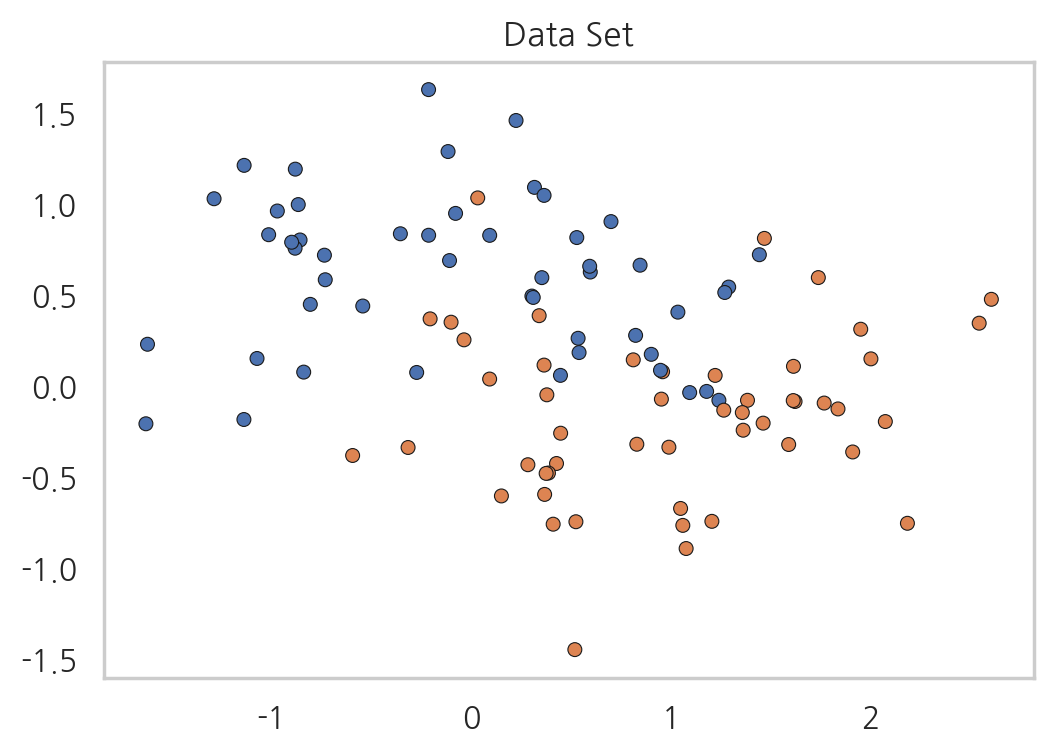

In [4]:
plt.figure()
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, marker="o", 
                s=25, edgecolor="k", legend=False)
plt.grid(False)
plt.title("Data Set")
plt.show() ; 

### fitting
- model : SVC
- cv : RepeatStratifiedKFold()
   - n_splits=10
   - n_repeats=10
   - 10 * 10 = 100번 실험
- score : roc_auc_score()

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score

In [8]:
%%time

p_grid = [
    {"kernel": ["linear"]},
    {"kernel": ["poly"], "degree": [2, 3]},
    {"kernel": ["rbf"]}
]

svc = SVC(random_state=0)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)
gs = GridSearchCV(estimator=svc, param_grid=p_grid, cv=cv, scoring="roc_auc")
gs.fit(X, y)

CPU times: total: 1.16 s
Wall time: 1.23 s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=10, random_state=0),
             estimator=SVC(random_state=0),
             param_grid=[{'kernel': ['linear']},
                         {'degree': [2, 3], 'kernel': ['poly']},
                         {'kernel': ['rbf']}],
             scoring='roc_auc')

### mean_test_score 탐색
- 어떤 모형의 성능이 더 좋은지 알 수 있다.
- 여기에 더하여 AUC score를 통해 모델의 성능을 대조하여 통계적 비교를 해야한다.
- RepeatedStratifiedKFold()를 통해서 10번의 교차검증을 10번 시행했으므로, 각 모델에는 100개의 AUC 점수가 있다. 
   - AUC 점수가 독립적이라고 볼 수 없다.
   - 모델간의 상관관계가 증가하게 된다.
   - 데이터를 분리할 때 클래스가 불균형일 수 있으므로, 이러한 경우 모델의 성능이 함께 올라가거나 함께 낮아질 수 있다는 의미(??)
   - 모델의 모든 AUC를 나타내고 상관관계를 계산하여 분할효과에 대해 확인 해 본다.

In [9]:
result_df = pd.DataFrame(gs.cv_results_)
result_df = result_df.sort_values("rank_test_score")
result_df = result_df.set_index(
    result_df["params"].apply(lambda x : "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
result_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
rbf,{'kernel': 'rbf'},1,0.9400,0.079297
linear,{'kernel': 'linear'},2,0.9300,0.077846
3_poly,"{'degree': 3, 'kernel': 'poly'}",3,0.9044,0.098776
2_poly,"{'degree': 2, 'kernel': 'poly'}",4,0.6852,0.169106


In [10]:
pd.DataFrame(gs.cv_results_)["params"].apply(lambda x: "_".join(str(v) for v in x.values()))

0    linear
1    2_poly
2    3_poly
3       rbf
Name: params, dtype: object

In [11]:
# 100개의 split test score 컬럼 검색

model_scores = result_df.filter(regex=r"split\d*_test_score")
model_scores

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,...,split90_test_score,split91_test_score,split92_test_score,split93_test_score,split94_test_score,split95_test_score,split96_test_score,split97_test_score,split98_test_score,split99_test_score
kernel,,,,,,,,,,,,,,,,,,,,,
rbf,0.92,0.72,0.76,0.92,1.00,1.00,1.00,1.00,0.96,1.00,...,0.96,0.88,1.00,0.72,0.92,1.00,0.96,1.00,1.00,0.84
linear,0.96,0.84,0.76,0.92,1.00,0.96,0.96,1.00,0.92,1.00,...,0.96,0.92,1.00,0.76,0.92,1.00,0.92,0.92,1.00,0.84
3_poly,1.00,0.72,0.76,0.92,1.00,0.88,0.96,0.84,0.96,0.96,...,0.92,0.92,1.00,0.68,0.96,1.00,0.96,0.92,1.00,0.56
2_poly,0.76,0.64,0.56,0.72,0.28,0.68,0.76,1.00,0.72,0.64,...,0.68,0.60,0.88,0.52,0.48,0.68,0.68,0.76,0.84,0.52


#### 컬럼을 검색하는 filter() 함수 테스트
- 정규표현식을 사용하여 검색할 수 있다.

In [12]:
# m 또는 p 로 시작하는 컬럼 조회

result_df.filter(regex=r"^(m|p)")

,mean_fit_time,mean_score_time,param_kernel,param_degree,params,mean_test_score
kernel,,,,,,
rbf,0.001090,0.001450,rbf,NaN,{'kernel': 'rbf'},0.9400
linear,0.001229,0.001840,linear,NaN,{'kernel': 'linear'},0.9300
3_poly,0.001070,0.001451,poly,3,"{'degree': 3, 'kernel': 'poly'}",0.9044
2_poly,0.001071,0.001469,poly,2,"{'degree': 2, 'kernel': 'poly'}",0.6852


In [13]:
# ee로 끝나는 컬럼 조회

result_df.filter(regex=r".ee")

,param_degree
kernel,
rbf,NaN
linear,NaN
3_poly,3
2_poly,2


### split에 따른 모델 성능(AUC)의 변화
- 모델별 점수의 상관관계를 확인 할 수 있다. 
- 즉 데이터 세트를 어떻게 split 했느냐에 따라서 모델의 성능이 변화한다.
- 데이터 샘플의 독립성을 가정하면 통계테스트에서 계산된 "분산"을 과소평가하게 되는 오류가 있을 수 있다.
- 이러한 것을 보완하기 위해서 수정된 분산 통계 테스트를 사용할 수 있다.
   - Nadeau, Bengio corrected t-test

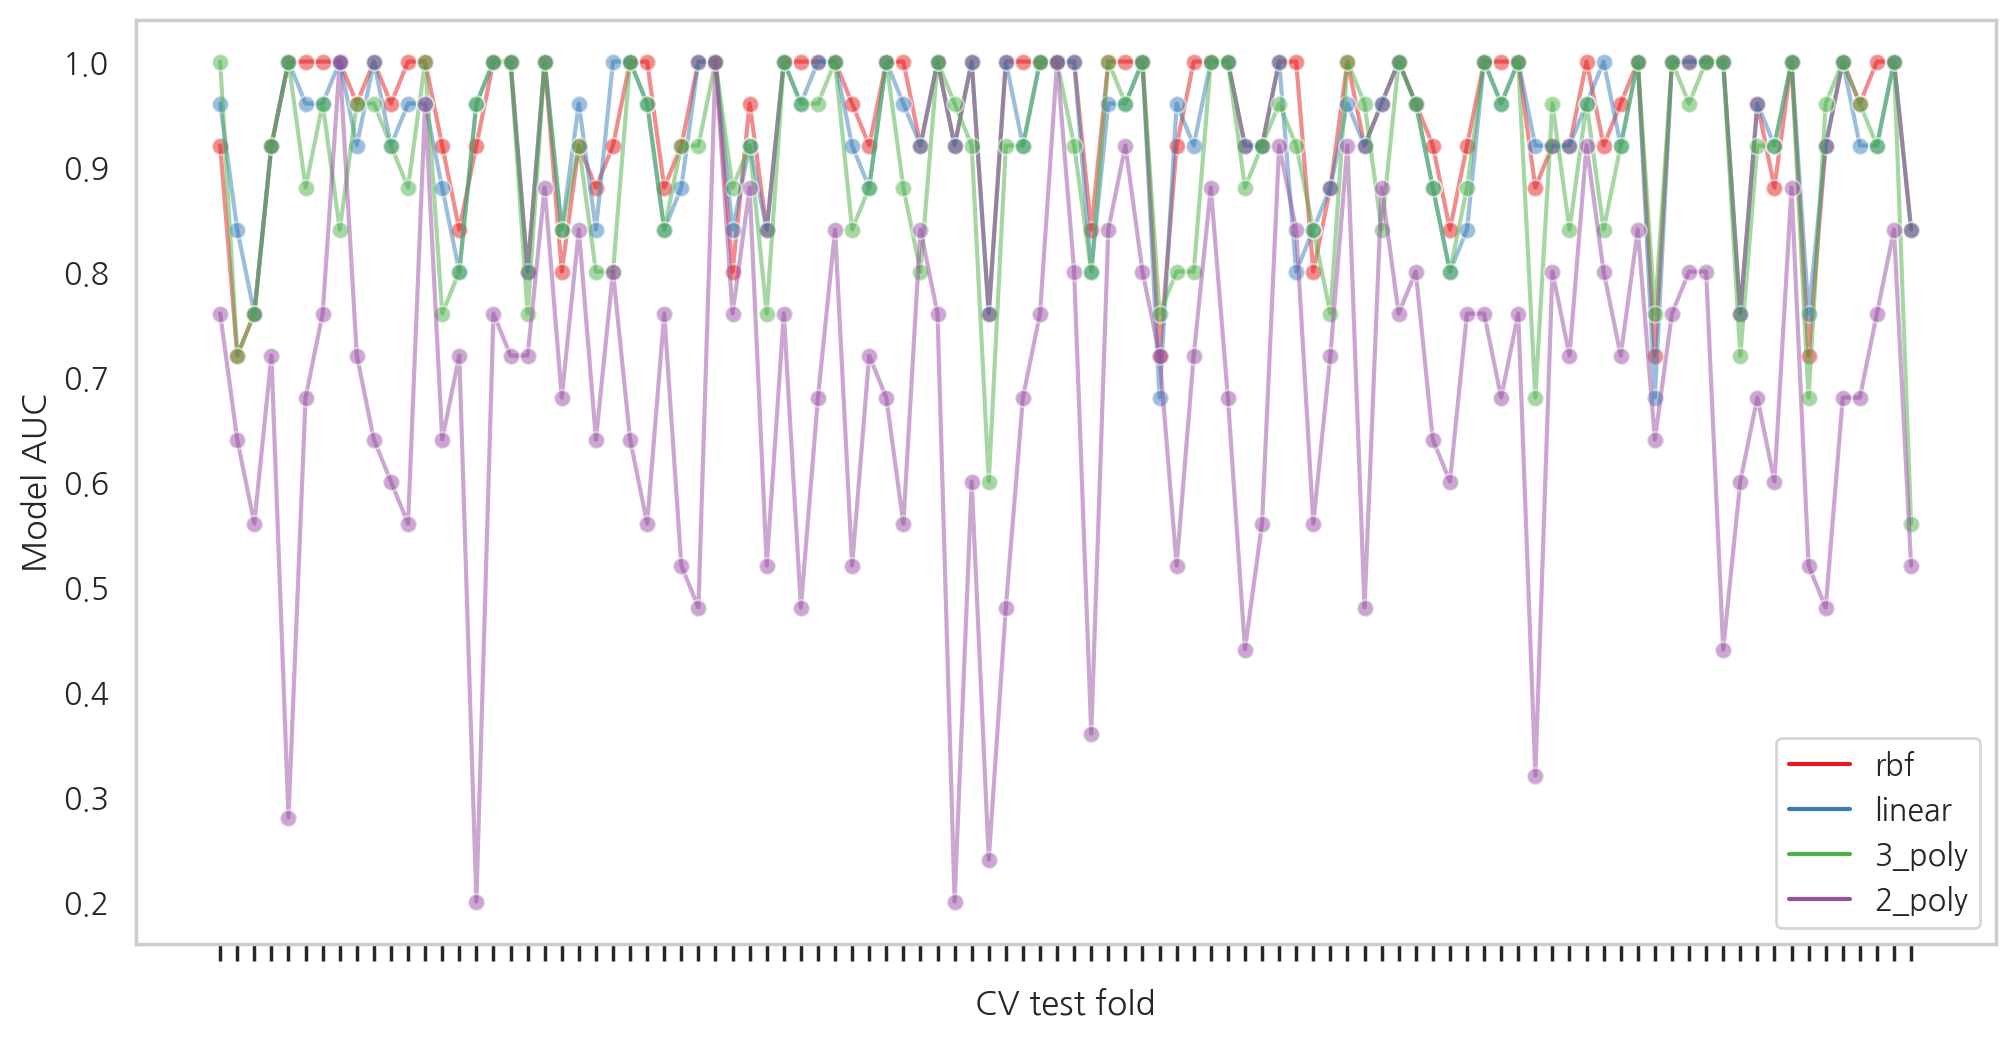

correlation of AUC models : 
 kernel       rbf    linear    3_poly    2_poly
kernel                                        
rbf     1.000000  0.882561  0.783392  0.351390
linear  0.882561  1.000000  0.746492  0.298688
3_poly  0.783392  0.746492  1.000000  0.355440
2_poly  0.351390  0.298688  0.355440  1.000000


In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=model_scores.transpose(),
            dashes=False,
            palette="Set1",
            marker="o",
            alpha=0.5,
            ax=ax)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("Model AUC", size=12)
ax.tick_params(bottom=True, labelbottom=False)
plt.legend(loc="best")
plt.grid(False)
plt.show() ; 

print(f"correlation of AUC models : \n {model_scores.transpose().corr()}")

In [16]:
model_scores.T.iloc[90:]

kernel,rbf,linear,3_poly,2_poly
split90_test_score,0.96,0.96,0.92,0.68
split91_test_score,0.88,0.92,0.92,0.60
split92_test_score,1.00,1.00,1.00,0.88
split93_test_score,0.72,0.76,0.68,0.52
split94_test_score,0.92,0.92,0.96,0.48
split95_test_score,1.00,1.00,1.00,0.68
split96_test_score,0.96,0.92,0.96,0.68
split97_test_score,1.00,0.92,0.92,0.76
split98_test_score,1.00,1.00,1.00,0.84
split99_test_score,0.84,0.84,0.56,0.52


### 두 모델의 비교 : 빈도주의적 접근
- rank 1 모델이 rank 2 모델 보다 더 좋은가?
   - 빈도주의적 접근의 비교 : t-test, p-value
   - Diebold-Mariano 논문
- t-test : 검정 통계량, t-통계량 : 모수 추정에서 판단의 근거가 되는 통계량 중 하나.
- the Neauda ans Bengio's paired corrected t-test
   - 낮은 false positive, false negative를 유지하면서 highest replicability scores를 얻을 수 있는 방법
   - 복제성 점수 : 동일한 데이터 세트의 다른 무작위 파티션에서 모델을 평가할 때 모델의 성능이 얼마나 비슷한지를 평가하는 방식
   - k : split 값
   - r : repeated 값
   - x_i,j : i, j 모델성능의 차이
   - n_test : 테스트에 사용된 샘플의 수
   - n_train : 학습에 사용된 샘플의 수
   - 시그마제곱햇 : 관찰된 차이의 분산
   - 모든 모델의 차이의 합을 차이의 분산으로 나눈 어떤 값
   
$t = \dfrac{\dfrac{1}{k*r} \sum_{i=1}^{k} \sum_{j=1}^{r} x_{i,j}}{\sqrt{\left(\dfrac{1}{k*r} + \dfrac{n_{test}}{n_{train}} \right)  \hat{\sigma^2}}}$

- 귀무가설 : "2번째 모델은 1번째 모델만큼 성능이 좋다", "두 모델은 성능의 차이가 없다."

#### cv_results_의 mean_test_score는 각 split 별 test score의 평균값

In [17]:
result_df[["params", "mean_test_score", "std_test_score", "rank_test_score"]]

,params,mean_test_score,std_test_score,rank_test_score
kernel,,,,
rbf,{'kernel': 'rbf'},0.9400,0.079297,1
linear,{'kernel': 'linear'},0.9300,0.077846,2
3_poly,"{'degree': 3, 'kernel': 'poly'}",0.9044,0.098776,3
2_poly,"{'degree': 2, 'kernel': 'poly'}",0.6852,0.169106,4


In [18]:
model_scores.mean(axis=1)

kernel
rbf       0.9400
linear    0.9300
3_poly    0.9044
2_poly    0.6852
dtype: float64

#### corrected t,p value 와 uncorrected t,p value
- Neauda-Bengio corrected paired t-test와 uncorrected p-value 값을 통하여 귀무가설을 검정한다.

$t = \dfrac{\dfrac{1}{k*r} \sum_{i=1}^{k} \sum_{j=1}^{r} x_{i,j}}{\sqrt{\left(\dfrac{1}{k*r} + \dfrac{n_{test}}{n_{train}} \right)  \hat{\sigma^2}}}$

In [28]:
# 스튜던트 t 분포

from scipy.stats import t

In [29]:
# 수정 표준편차 : 분모의 값

def corrected_std(differences, n_train, n_test) : 
    
    kr = len(differences)
    corrected_var = np.var(differences, ddof=1) * (1/kr + n_test/n_train)
    corrected_std = np.sqrt(corrected_var)
    
    return corrected_std

In [30]:
def compute_corrected_ttest(differences, df, n_test, n_train) : 
    
    mean = np.mean(differences)
    std = corrected_std(differences, n_test, n_train)
    t_stat = mean / std
    # 스튜던트 t 분포의 생존함수 : 1 - cdf (cdf : 누적밀도함수)
    p_val = t.sf(np.abs(t_stat), df)
    
    return t_stat, p_val

In [31]:
model_1_scores = model_scores.iloc[0].values
model_2_scores = model_scores.iloc[1].values

differences = model_1_scores - model_2_scores
differences

array([-4.00000000e-02, -1.20000000e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.00000000e-02,  4.00000000e-02,  0.00000000e+00,
        4.00000000e-02,  0.00000000e+00,  4.00000000e-02,  4.00000000e-02,
        4.00000000e-02,  4.00000000e-02,  4.00000000e-02, -4.00000000e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.00000000e-02, -4.00000000e-02,  4.00000000e-02, -8.00000000e-02,
        0.00000000e+00,  4.00000000e-02,  4.00000000e-02,  4.00000000e-02,
        0.00000000e+00,  0.00000000e+00, -4.00000000e-02,  4.00000000e-02,
        0.00000000e+00,  0.00000000e+00,  4.00000000e-02,  0.00000000e+00,
        0.00000000e+00,  4.00000000e-02,  4.00000000e-02,  0.00000000e+00,
        4.00000000e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.11022302e-16,  0.00000000e+00,  8.00000000e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.00000000e-02,
        4.00000000e-02,  

In [32]:
differences.shape

(100,)

In [33]:
# df : degree of freedom

n = differences.shape[0]
df = n - 1

print(f"n : {n}, df : {df}")

n : 100, df : 99


In [34]:
# cv의 split 매서드로부터 train, test set의 index를 반환

list(cv.split(X, y))[0][0]

array([ 0,  1,  3,  4,  5,  6,  8,  9, 10, 11, 12, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 85, 86, 87, 88, 89, 90, 91,
       94, 95, 96, 97, 98])

In [35]:
n_train = len(list(cv.split(X, y))[0][0]) # train set의 길이
n_test = len(list(cv.split(X, y))[0][1]) # test set의 길이

print(f"len of train set : {n_train}, len of test set : {n_test}")

len of train set : 90, len of test set : 10


#### corrected p-value의 의미
- model 1과 model 2의 성능의 차이를 통해서 성능에대한 귀무가설을 검정
- 가설
   - 귀무가설 : model 2의 성능과 model 1의 성능은 같다. 
      - \mu_1 - \mu_2 = 0
   - 대립가설 : model 2의 성능과 model 1의 성능은 같지 않다.
- p-value : 유의확률
   - 22% 로 유의수준보다 크므로 귀무가설을 기각할 수 없다. 
   - 즉 model 2의 성능은 model 1과 같다고 말할 수 있다.

In [36]:
t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"corrected t-value : {t_stat:.3f}\ncorrected p-value : {p_val:.3f}")

corrected t-value : 0.750
corrected p-value : 0.227


#### uncorrected t-test, p-value
- t_stat_uncorrected : t-통계량
- p_val_uncorrected : 스튜던트 t분포의 생존함수 값
   - 0.005로 유의수준 보다 작으므로 귀무가설을 기각할 수 있다.
   - 즉 model 1과 model 2는 같다고 할 수 없다.

In [37]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1)/n)
t_stat_uncorrected

2.6111648393354643

In [38]:
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)
p_val_uncorrected

0.0052130131503932385

In [39]:
print(f"uncorrected t-test : {t_stat_uncorrected:.3f}\nuncorrected p-value : {p_val_uncorrected:.3f}")

uncorrected t-test : 2.611
uncorrected p-value : 0.005


#### 성능의 분포

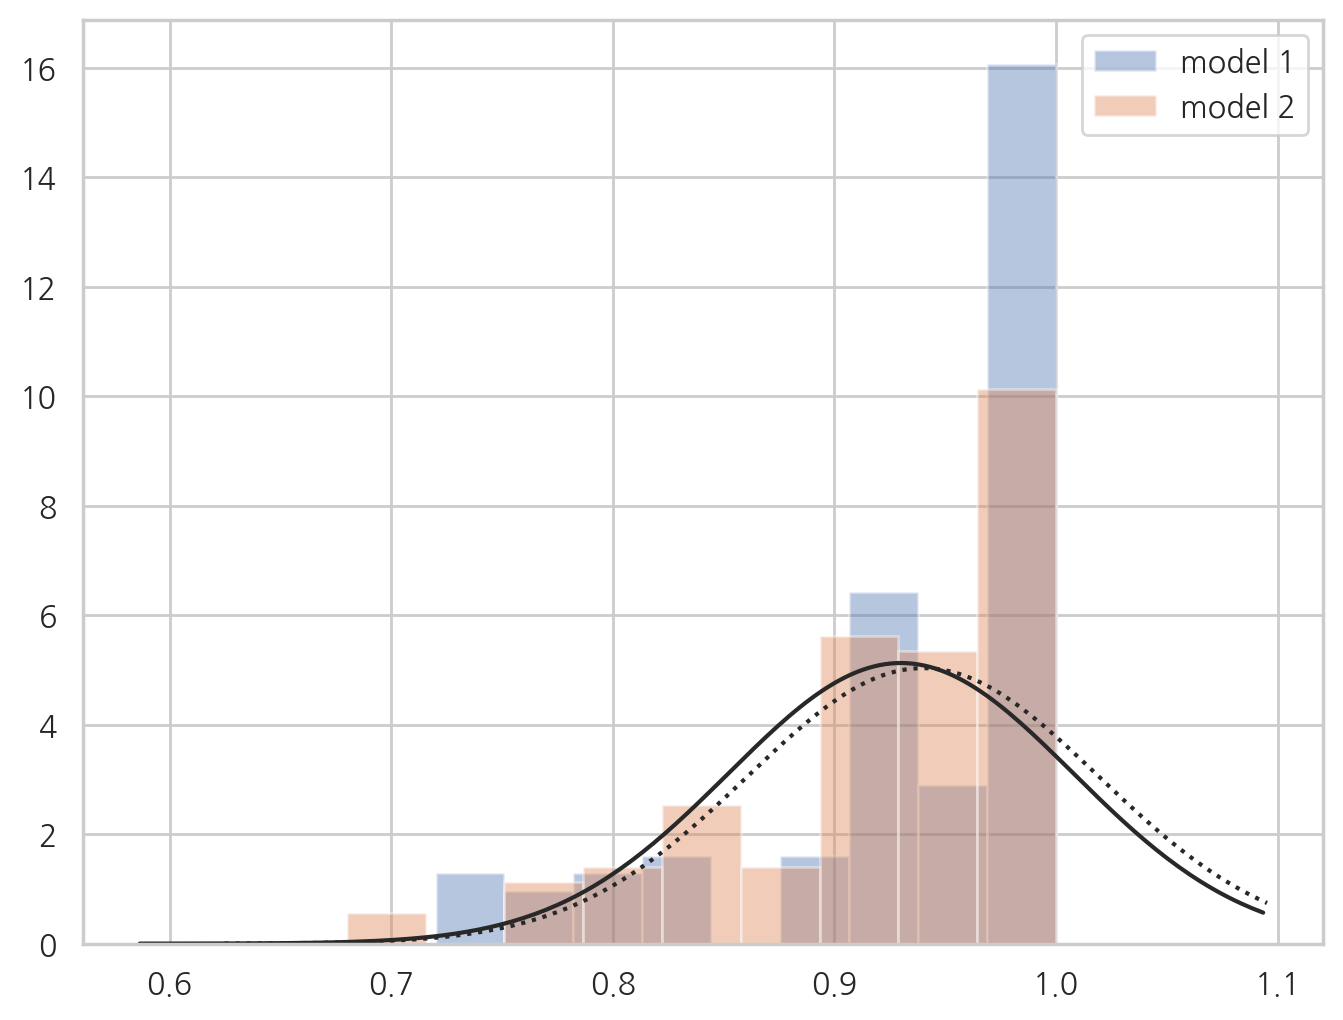

In [40]:
plt.figure(figsize=(8, 6))
ax = sns.distplot(model_scores.iloc[0].values, kde=False, fit=sp.stats.norm, 
                  label="model 1")
ax = sns.distplot(model_scores.iloc[1].values, kde=False, fit=sp.stats.norm,
                  label="model 2")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.show() ; 

### 두 모델의 성능 비교 : 베이지안 접근
- 베이지안 추정을 사용하여 model1이 model2 보다 더 좋을 확률을 계산한다.
   - 사후확률분포 = 가능도분포 * 사전확률분포 / 확률질량함수
      - 모수적 방법 : 다른 확률분포를 사용하여 추정된 모수의 분포를 나타내는 방식
      - 비모수적 방법 : 모수의 분포와 동일한 분포를 가지는 실제 표본집합을 만들고, 히스토그램이나 최빈값 등으로 나타낸다. (MCMC 방법)
   - 두 모형의 성능 차이의 평균 mu의 분포를 출력해준다.
   - split1의 차이, split2의 차이, ..., split100의 차이의 평균
- Benavoli의 추정 방식
   - 두 분류기의 성능을 비교하기 위해, 켤레(conjugate) 사전확률분포로 정규감마분포를 사용한다.
   - 켤레 사전확률분포를 사용한 베이즈 정리는 사후분포와 사전분포가 모수는 다르고 형태가 같아진다.
   - 사후분포도 정규분포가 된다.
      - 사후분포를 marginalizing하면 평균 파라미터의 사후분포를 스튜던트-t분포로 정의할 수 있다. 
      - 스튜던트t 분포의 분산으로 Nadeau and Bengios 의 수정 분산을 사용한다.

In [41]:
df, np.mean(differences)

(99, 0.009999999999999986)

In [42]:
# 스튜던트 t분포 확률변수 : scale: 표준편차, loc: 기댓값

t_post = t(
    df, loc=np.mean(differences), scale=corrected_std(differences, n_train, n_test)
)
t_post

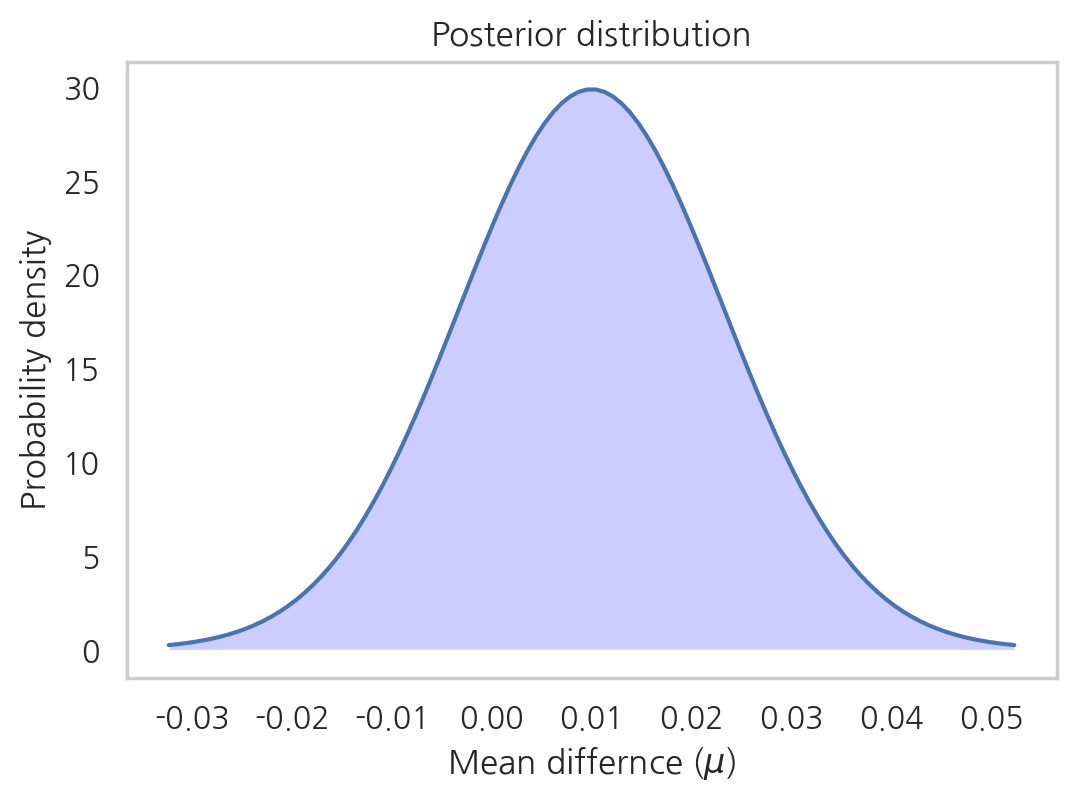

In [43]:
dist_x = np.linspace(t_post.ppf(0.001), t_post.ppf(0.999), 100)

plt.plot(dist_x, t_post.pdf(dist_x))
plt.xticks(np.arange(-0.04, 0.06, 0.01))
plt.fill_between(dist_x, t_post.pdf(dist_x), 0, facecolor="blue", alpha=0.2)
plt.xlabel(r"Mean differnce ($\mu$)")
plt.ylabel("Probability density")
plt.grid(False)
plt.title("Posterior distribution")
plt.show() ;

In [45]:
np.mean(differences)

0.009999999999999986

In [44]:
dist_x.min(), dist_x.max()

(-0.03231041089954392, 0.05231041089954389)

#### 베이지안 추정을 사용한 두 모델의 성능 비교
- 스튜던트 t 확률변수의 pdf를 만들고, 면적을 구하면 해당 구간의 확률을 비교를 할 수 있다.
- 1 - t_post.cdf(0) : 0~양의 무한대까지의 면적 : 우측검정에 해당
   - 이 값은 model 1의 성능에서 model 2의 성능을 뺀 값이 양수인 경우의 크기에 해당한다.
- t_post.cdf(0) : 음의 무한대에서 0까지의 면적 : 좌측검정에 해당
   - 이 값은 model 1의 성능에서 model 2의 성능을 뺀 값이 음수인 경우의 크기에 해당한다.
- 측정결과
   - 성능 차이가 양수가 될 확률이 더 크기때문에 model1이 model2 보다 좋다고 보여진다.

In [46]:
# 확률 계산
## model1이 model2보다 좋을 확률 : 전체 면적 1에서 0.0의 까지의 면적을 빼면 0.0 이후의 면적 (model 1이 model 2보다 성능이 좋은 경우 차이의 평균은 양수가 되므로)
## model2가 model1보다 좋을 확률 : 0.0까지의 면적

better_prob = 1 - t_post.cdf(0)

print(f"proba of {model_scores.index[0]} being more accurate than "
      f"{model_scores.index[1]} : {better_prob:.3f}")
print(f"proba of {model_scores.index[1]} being more accurate than "
     f"{model_scores.index[0]} : {1 - better_prob:.3f}")

proba of rbf being more accurate than linear : 0.773
proba of linear being more accurate than rbf : 0.227


In [47]:
result_df[["params", "mean_test_score", "std_test_score", "rank_test_score"]]

,params,mean_test_score,std_test_score,rank_test_score
kernel,,,,
rbf,{'kernel': 'rbf'},0.9400,0.079297,1
linear,{'kernel': 'linear'},0.9300,0.077846,2
3_poly,"{'degree': 3, 'kernel': 'poly'}",0.9044,0.098776,3
2_poly,"{'degree': 2, 'kernel': 'poly'}",0.6852,0.169106,4


#### 베이지안 추정의 ROPE(Region of Practical Equivalence)
- 두 모델의 성능이 같은가? 에 대한 확률을 계산하기 위해, mu=0.0인 구간의 면적을 계산한다.
   - 정확도 차이의 범위를 +- 1% 이내로 설정하고 모델의 성능차이가 1% 미만이면 실질적으로 성능이 동일한 것으로 간주할 수 있다.
   - range : [-0.01, 0.01]
- 아래의 측정값에 의하면 두 모델의 성능이 동등하다고 볼 수 있다.
   - 실질적 동등 범위안에 들어갈 확률이 43% 이다.
   - 즉 두 모델이 실질적으로 같을 확률이 43% 가량 된다.

In [48]:
rope_interval = [-0.01, 0.01]
rope_prob = t_post.cdf(rope_interval[1]) - t_post.cdf(rope_interval[0])

print(
    f"proba of {model_scores.index[0]} and {model_scores.index[1]} "
    f"being practically equivalent : {rope_prob:.3f}")

proba of rbf and linear being practically equivalent : 0.432


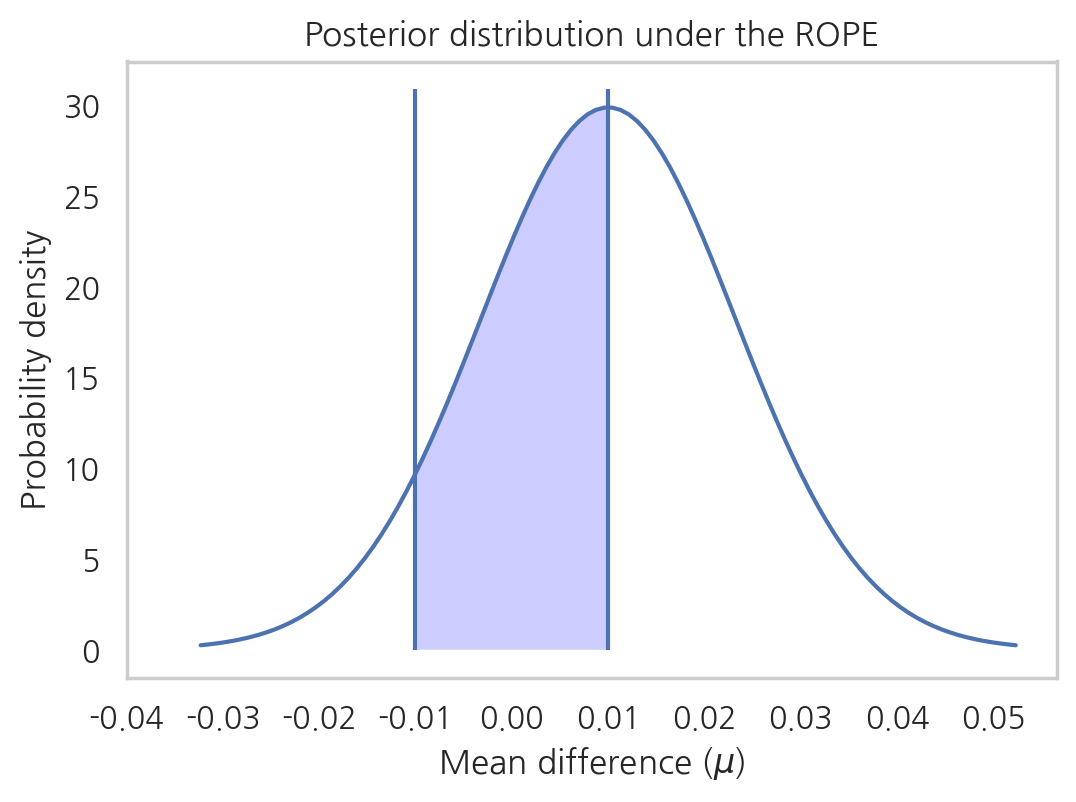

In [50]:
x_rope = np.linspace(rope_interval[0], rope_interval[1])

plt.plot(dist_x, t_post.pdf(dist_x))
plt.fill_between(x_rope, t_post.pdf(x_rope), facecolor="blue", alpha=0.2)
plt.vlines([-0.01, 0.01], ymin=0, ymax=(np.max(t_post.pdf(dist_x)) + 1))
plt.xticks(np.arange(-0.04, 0.06, 0.01))
plt.xlabel(r"Mean difference ($\mu$)")
plt.ylabel("Probability density")
plt.title("Posterior distribution under the ROPE")
plt.grid(False)
plt.show() ; 

### 신뢰구간을 사용한 성능 비교
- 모델의 성능차이가 구간 x, y에 있을 확률
- 스튜던트 t 확률변수의 interval 매서드
   - 중앙값 주변의 면적이 동일한 신뢰구간
   - 50%의 구간, 75%의 구간, 95%의 구간

In [51]:
cred_intervals = []
intervals = [0.5, 0.75, 0.95]

for interval in intervals : 
    cred_interval = list(t_post.interval(interval))
    cred_intervals.append([interval, cred_interval[0], cred_interval[1]])
    
cred_int_df = pd.DataFrame(
    cred_intervals, 
    columns=["interval", "lower_value", "upper_value"]).set_index("interval")
cred_int_df

,lower_value,upper_value
interval,,
0.50,0.000977,0.019023
0.75,-0.005422,0.025422
0.95,-0.016445,0.036445


In [55]:
cred_int_df["dist_values"] = cred_int_df["upper_value"] - cred_int_df["lower_value"]
cred_int_df

,lower_value,upper_value,dist_values
interval,,,
0.50,0.000977,0.019023,0.018045
0.75,-0.005422,0.025422,0.030844
0.95,-0.016445,0.036445,0.052890


### 모든 모델에 대한 빈도주의적 접근방식의 비교
- rank1, rank2 의 성능간 비교 뿐아니라 나머지 모델들과의 비교도 가능
- 통계값을 여러번 계산해야하는 다중비교문제가 발생함
   - 여러 가설을 검증 할 때 생기는 문제로 1종 오류가 발생할 수 있다.
   - 이것을 해결하는 방법으로 Bonferroni 보정을 적용할수 있다.
   - p-value에 테스트 중인 비교총횟수(조합수)를 곱한다.
- pairwise_comp_df 측정 의미
   - p_val : 귀무가설 "model2와 model1의 성능은 같다"에 대한 유의확률
   - rank1 모델인 rbf는 linear, 3_poly 모델과 거의 같다고 할 수 있다.
   - 2_poly 모델은 다른 모델들과 큰 차이가 난다.

In [60]:
from itertools import combinations
from math import factorial

In [64]:
factorial(5)

120

In [65]:
1 * 2 * 3 * 4 * 5

120

#### 모드 모델간의 비교 조합

In [69]:
n_comparison = factorial(len(model_scores)) \
               / (factorial(2) * factorial(len(model_scores) - 2 ))
n_comparison

6.0

In [83]:
pairwise_t_test = []

for model_i, model_k in combinations(range(len(model_scores)), 2) : 
    
    model_i_scores = model_scores.iloc[model_i].values
    model_k_scores = model_scores.iloc[model_k].values
    differences = model_i_scores - model_k_scores
    t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
    # Bonferroni correction p-value
    p_val *= n_comparison
    # 1보다 크면 1로 저장
    p_val = 1 if p_val > 1 else p_val
    pairwise_t_test.append([model_scores.index[model_i], 
                          model_scores.index[model_k],
                          t_stat,
                          p_val])

pairwise_comp_df = pd.DataFrame(
    pairwise_t_test, columns=["model_1", "model_2", "t_test", "p_val"]).round(3)
pairwise_comp_df    

,model_1,model_2,t_test,p_val
0,rbf,linear,0.750,1.000
1,rbf,3_poly,1.657,0.302
2,rbf,2_poly,4.565,0.000
3,linear,3_poly,1.111,0.807
4,linear,2_poly,4.276,0.000
5,3_poly,2_poly,3.851,0.001


### 베이지안 측정은 모든 모델 조합이 적용가능
- rbf가 linear 보다 성능이 안 좋을 확률은 6.8%
- rbf가 linear 보다 성능이 좋을 확률은 50%
- rbf와 linear의 성능이 실질적으로 동일할 확률은 43%
- rbf, linear, 3_poly 모델은 모두 2_poly 모델보다 성능이 좋다.

In [95]:
pairwise_bayesian = []

for model_i, model_k in combinations(range(len(model_scores)), 2) : 
    
    model_i_scores = model_scores.iloc[model_i].values
    model_k_scores = model_scores.iloc[model_k].values
    diff = model_i_scores - model_k_scores
    t_post = t(df, loc=np.mean(diff), scale=corrected_std(diff, n_train, n_test))
    worse_prob = t_post.cdf(rope_interval[0]) 
    better_prob = 1 - t_post.cdf(rope_interval[1])
    rope_prob = t_post.cdf(rope_interval[1]) - t_post.cdf(rope_interval[0])
    
    pairwise_bayesian.append([worse_prob, better_prob, rope_prob])
    
pairwise_bayesian_df = pd.DataFrame(
    pairwise_bayesian, columns=["worse_prob", "better_prob", "rope_prob"]).round(3)
pairwise_comp_df = pairwise_comp_df.join(pairwise_bayesian_df)
pairwise_comp_df

,model_1,model_2,t_test,p_val,worse_prob,better_prob,rope_prob
0,rbf,linear,0.750,1.000,0.068,0.500,0.432
1,rbf,3_poly,1.657,0.302,0.018,0.882,0.100
2,rbf,2_poly,4.565,0.000,0.000,1.000,0.000
3,linear,3_poly,1.111,0.807,0.063,0.750,0.187
4,linear,2_poly,4.276,0.000,0.000,1.000,0.000
5,3_poly,2_poly,3.851,0.001,0.000,1.000,0.000


### 모델 성능의 통계적 비교 요약
- 성능의 작은 차이는 우연이라고 쉽게 판명될 수 있지만, 한 모델이 다른 모델보다 체계적인 시스템에 의해 더 잘 예측했다고 할 수는 없다. 
   - 빈도주의적, 베이지안 접근을 통해서 살펴봤듯이 성능이 유사할 수 있다.
- GCV의 성능을 통계적으로 비교할 때 모델의 점수가 서로 독립적이지 않기 때문에 과소평가될 수 있는 분산을 보정(corrected)해야 한다.
- corrected variance paired t-test(검정)을 사용하는 빈도주의적 접근 방식은 확률(베이지안 추정)보다 확실하게 한 모델의 성능이 다른 모델의 성능보다 나은지 여부를 알려 줄 수 있다.
- 베이지안 접근법은 한 모형이 다른 모형보다 더 낫거나, 나쁘거나, 실질적으로 동등할 확률을 제공해준다. 모형간의 실질적인 차이가 특정 범위의 값에 대한 신뢰구간으로 알려준다. 
   - t_post.interval(0.5), t_post.interval(0.75), t_post.interval(0.95)
- 여러 모델을 통계적으로 비교하는 경우에는 빈도주의적 접근방식을 사용할 때 다중 비교 수정이 필요하다.    

## 모델 성능의 통계적 비교 다시 연습

In [53]:
from sklearn.datasets import make_moons

In [61]:
X, y = make_moons(noise=0.374, random_state=1, n_samples=300)

X.shape, y.shape

((300, 2), (300,))

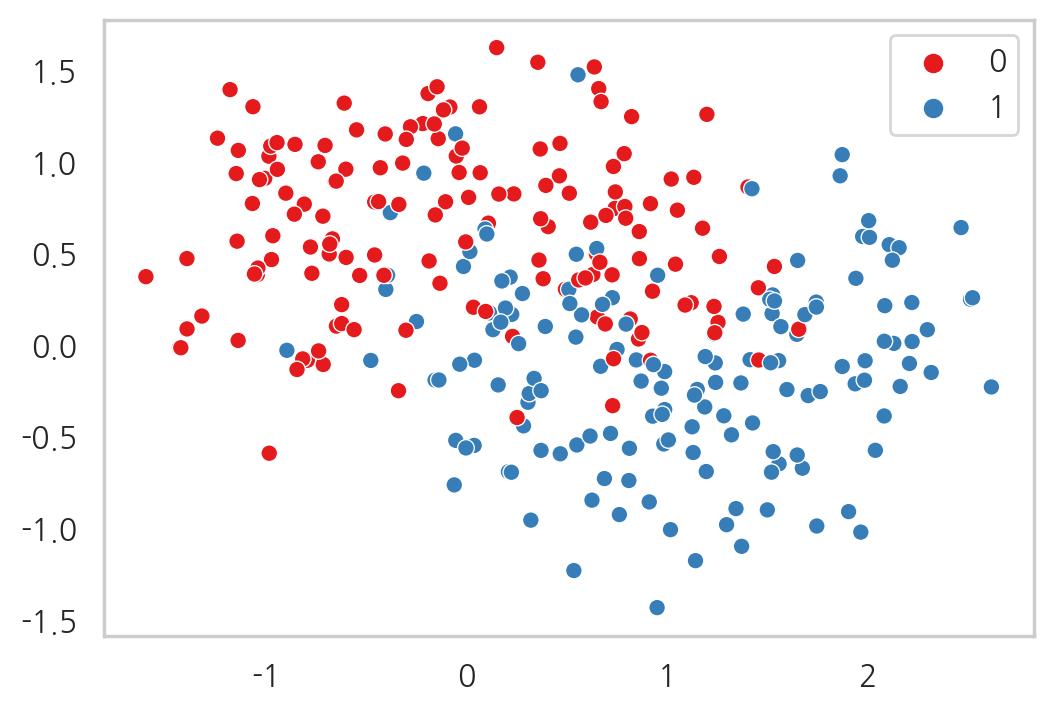

In [62]:
plt.figure()
sns.scatterplot(x=X[:, 0], y=X[:, 1], palette="Set1", hue=y)
plt.grid(False)
plt.show() ; 

In [63]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

In [64]:
%%time

svc = SVC(random_state=30)
param_grid = [{"kernel": ["rbf"]},
             {"kernel": ["linear"]},
             {"kernel": ["poly"], "degree": [2, 3]}]
repeat_kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)
gs = GridSearchCV(estimator=svc, param_grid=param_grid, scoring="roc_auc", cv=repeat_kfold)
gs.fit(X, y)

CPU times: total: 4.59 s
Wall time: 4.74 s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=10, random_state=0),
             estimator=SVC(random_state=30),
             param_grid=[{'kernel': ['rbf']}, {'kernel': ['linear']},
                         {'degree': [2, 3], 'kernel': ['poly']}],
             scoring='roc_auc')

In [65]:
result_df = pd.DataFrame(gs.cv_results_).sort_values("rank_test_score")
result_df = result_df.set_index(result_df["params"].apply(lambda x : "_".join([str(v) for v in x.values()])))
result_df.index.name = "kernel"
result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_degree,params,split0_test_score,split1_test_score,split2_test_score,...,split93_test_score,split94_test_score,split95_test_score,split96_test_score,split97_test_score,split98_test_score,split99_test_score,mean_test_score,std_test_score,rank_test_score
kernel,,,,,,,,,,,,,,,,,,,,,
rbf,0.005938,0.001125,0.005014,0.001100,rbf,NaN,{'kernel': 'rbf'},0.928889,0.933333,0.968889,...,0.937778,0.986667,0.964444,0.951111,0.906667,0.831111,0.982222,0.937067,0.044068,1
linear,0.005341,0.001148,0.004431,0.000815,linear,NaN,{'kernel': 'linear'},0.893333,0.937778,0.964444,...,0.911111,0.960000,0.960000,0.928889,0.866667,0.853333,0.942222,0.918889,0.044791,2
3_poly,0.006170,0.000990,0.004530,0.000899,poly,3,"{'degree': 3, 'kernel': 'poly'}",0.871111,0.924444,0.946667,...,0.915556,0.951111,0.964444,0.920000,0.866667,0.813333,0.937778,0.911511,0.047641,3
2_poly,0.007244,0.000851,0.004670,0.000837,poly,2,"{'degree': 2, 'kernel': 'poly'}",0.697778,0.684444,0.791111,...,0.768889,0.857778,0.653333,0.720000,0.764444,0.755556,0.768889,0.739333,0.081369,4


In [66]:
result_df[["params", "mean_test_score", "std_test_score", "rank_test_score"]]

,params,mean_test_score,std_test_score,rank_test_score
kernel,,,,
rbf,{'kernel': 'rbf'},0.937067,0.044068,1
linear,{'kernel': 'linear'},0.918889,0.044791,2
3_poly,"{'degree': 3, 'kernel': 'poly'}",0.911511,0.047641,3
2_poly,"{'degree': 2, 'kernel': 'poly'}",0.739333,0.081369,4


In [67]:
model_scores = result_df.filter(regex="^split")
model_scores

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,...,split90_test_score,split91_test_score,split92_test_score,split93_test_score,split94_test_score,split95_test_score,split96_test_score,split97_test_score,split98_test_score,split99_test_score
kernel,,,,,,,,,,,,,,,,,,,,,
rbf,0.928889,0.933333,0.968889,0.995556,0.977778,0.880000,0.955556,0.911111,0.857778,0.924444,...,0.937778,0.897778,0.991111,0.937778,0.986667,0.964444,0.951111,0.906667,0.831111,0.982222
linear,0.893333,0.937778,0.964444,0.995556,0.960000,0.902222,0.946667,0.884444,0.808889,0.897778,...,0.946667,0.875556,0.977778,0.911111,0.960000,0.960000,0.928889,0.866667,0.853333,0.942222
3_poly,0.871111,0.924444,0.946667,0.991111,0.955556,0.880000,0.933333,0.920000,0.782222,0.902222,...,0.937778,0.902222,0.911111,0.915556,0.951111,0.964444,0.920000,0.866667,0.813333,0.937778
2_poly,0.697778,0.684444,0.791111,0.782222,0.840000,0.742222,0.720000,0.768889,0.582222,0.786667,...,0.826667,0.622222,0.786667,0.768889,0.857778,0.653333,0.720000,0.764444,0.755556,0.768889


In [68]:
model_scores.mean(axis=1)

kernel
rbf       0.937067
linear    0.918889
3_poly    0.911511
2_poly    0.739333
dtype: float64

In [14]:
%matplotlib inline

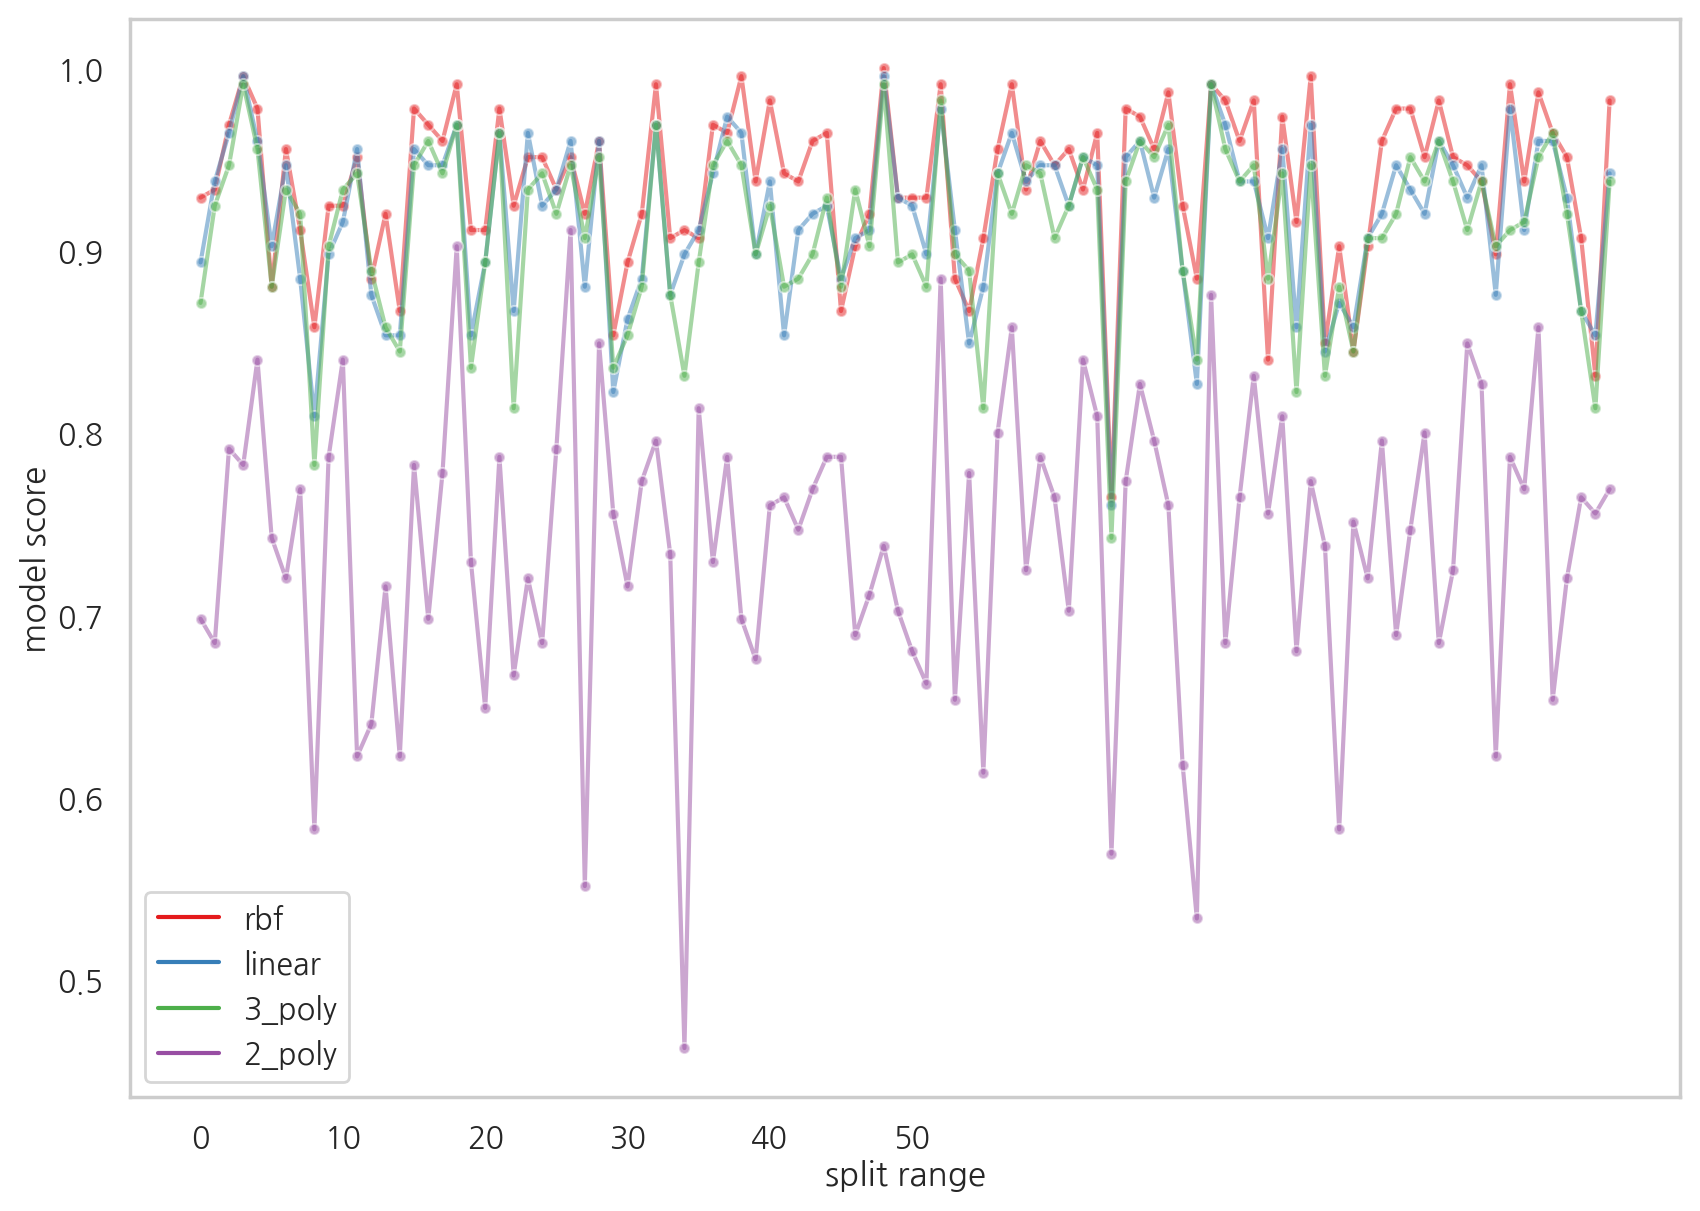

In [71]:
plt.figure(figsize=(10, 7))
sns.lineplot(model_scores.T, dashes=False, palette="Set1", marker="o", ms=4, alpha=0.5)
plt.xticks(np.arange(0, 51, 10), np.arange(0, 51, 10))
plt.xlabel("split range", labelpad=2)
plt.ylabel("model score", labelpad=2)
plt.grid(False)
plt.legend(loc="best")
plt.show() ; 

In [72]:
print(model_scores.T.corr())

kernel       rbf    linear    3_poly    2_poly
kernel                                        
rbf     1.000000  0.874132  0.828286  0.447834
linear  0.874132  1.000000  0.910055  0.520553
3_poly  0.828286  0.910055  1.000000  0.538899
2_poly  0.447834  0.520553  0.538899  1.000000


In [73]:
def corrected_std(diff, n_train, n_test) : 
    
    kr = len(diff)
    corrected_var = np.var(diff, ddof=1) * (1/kr + n_test/n_train)
    corrected_std = np.sqrt(corrected_var)
    
    return corrected_std

In [74]:
from scipy.stats import t

In [75]:
def compute_corrected_statics(diff, df, n_train, n_test) : 
    
    mean = np.mean(diff)
    std = corrected_std(diff, n_train, n_test)
    t_stat = mean / std
    p_value = t.sf(np.abs(t_stat), df)
    
    return t_stat, p_value

In [79]:
result_df[["mean_test_score", "std_test_score", "rank_test_score"]]

,mean_test_score,std_test_score,rank_test_score
kernel,,,
rbf,0.937067,0.044068,1
linear,0.918889,0.044791,2
3_poly,0.911511,0.047641,3
2_poly,0.739333,0.081369,4


In [76]:
model_scores.T.corr()

kernel,rbf,linear,3_poly,2_poly
kernel,,,,
rbf,1.000000,0.874132,0.828286,0.447834
linear,0.874132,1.000000,0.910055,0.520553
3_poly,0.828286,0.910055,1.000000,0.538899
2_poly,0.447834,0.520553,0.538899,1.000000


In [78]:
model_2_score = model_scores.iloc[1].values
model_3_score = model_scores.iloc[2].values
diff = model_2_score - model_3_score
diff

array([ 2.22222222e-02,  1.33333333e-02,  1.77777778e-02,  4.44444444e-03,
        4.44444444e-03,  2.22222222e-02,  1.33333333e-02, -3.55555556e-02,
        2.66666667e-02, -4.44444444e-03, -1.77777778e-02,  1.33333333e-02,
       -1.33333333e-02, -4.44444444e-03,  8.88888889e-03,  8.88888889e-03,
       -1.33333333e-02,  4.44444444e-03,  0.00000000e+00,  1.77777778e-02,
        1.11022302e-16,  0.00000000e+00,  5.33333333e-02,  3.11111111e-02,
       -1.77777778e-02,  1.33333333e-02,  1.33333333e-02, -2.66666667e-02,
        8.88888889e-03, -1.33333333e-02,  8.88888889e-03,  4.44444444e-03,
        0.00000000e+00, -1.11022302e-16,  6.66666667e-02,  1.77777778e-02,
       -4.44444444e-03,  1.33333333e-02,  1.77777778e-02, -1.11022302e-16,
        1.33333333e-02, -2.66666667e-02,  2.66666667e-02,  2.22222222e-02,
       -4.44444444e-03,  4.44444444e-03, -2.66666667e-02,  8.88888889e-03,
        4.44444444e-03,  3.55555556e-02,  2.66666667e-02,  1.77777778e-02,
       -4.44444444e-03,  

In [80]:
n_train = len(list(repeat_kfold.split(X, y))[0][0])
n_test = len(list(repeat_kfold.split(X, y))[0][1])

n_train, n_test

(270, 30)

In [81]:
n = model_scores.shape[1]
df = n - 1
df

99

In [85]:
t_stat, p_value = compute_corrected_statics(diff, df, n_train, n_test)

print("corrected t_stat : ", t_stat.round(3))
print("corrected p_value : ", p_value.round(3))

corrected t_stat :  0.124
corrected p_value :  0.451


In [87]:
mean = np.mean(diff)
std = np.sqrt(np.var(diff, ddof=1) / n)
uncorrected_t_stat = mean / std
uncorrected_p_value = t.sf(np.abs(uncorrected_t_stat), df)

print("uncorrected t_stat : ", uncorrected_t_stat.round(3))
print("uncorrected p_value : ", uncorrected_p_value.round(3))

uncorrected t_stat :  3.708
uncorrected p_value :  0.0


### Bayesian estimator

In [93]:
n_train, n_test

(270, 30)

In [96]:
t_rv = t(df, loc=mean, scale=corrected_std(diff, n_train, n_test))
x = np.linspace(t_rv.ppf(0.001), t_rv.ppf(0.999), 100)

x.min(), x.max()

(-0.18223639870417654, 0.19699195425973204)

In [102]:
mean

0.0073777777777777696

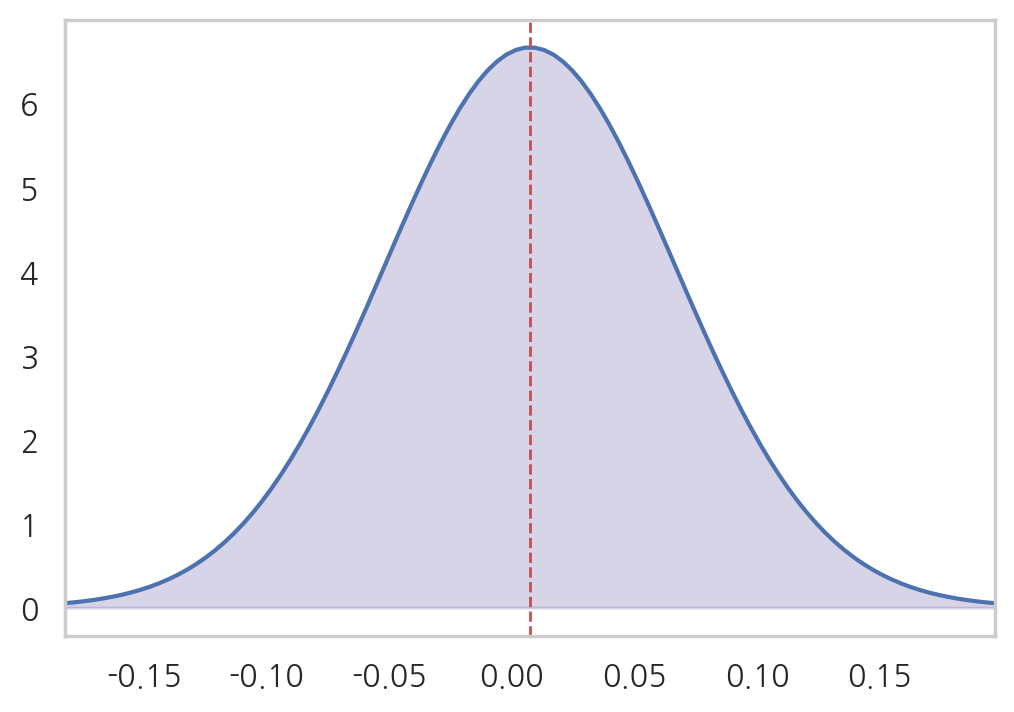

In [106]:
plt.figure()
plt.plot(x, t_rv.pdf(x), color="b", linestyle="-")
plt.axvline(mean, color="r", linestyle="--", linewidth=1)
plt.fill_between(x, t_rv.pdf(x), color="m", alpha=0.3)
plt.xlim(x.min(), x.max())
plt.grid(False)
plt.show() ; 

In [112]:
print(f"model 2 {model_scores.index[1]}, mean test score : {model_scores.mean(axis=1)[1]:.3f}")
print(f"model 3 {model_scores.index[2]}, mean test score : {model_scores.mean(axis=1)[2]:.3f}")

model 2 linear, mean test score : 0.919
model 3 3_poly, mean test score : 0.912


In [117]:
better_prob = 1 - t_rv.cdf(0)
worst_prob = t_rv.cdf(0)

print(f"prob of {model_scores.index[1]} kernel score better than {model_scores.index[2]} kernel socre : {better_prob.round(3)}")
print(f"prob of {model_scores.index[1]} kernel score lowest than {model_scores.index[2]} kernel socre : {worst_prob.round(3)}")

prob of linear kernel score better than 3_poly kernel socre : 0.549
prob of linear kernel score lowest than 3_poly kernel socre : 0.451


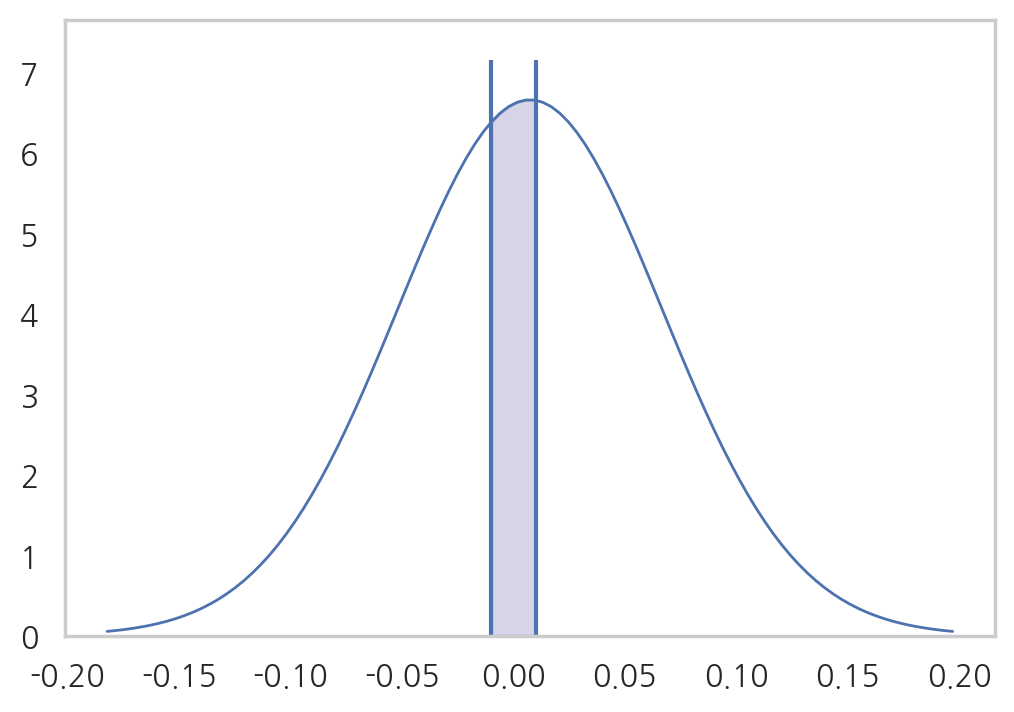

In [131]:
x_interval = np.linspace(interval[0], interval[1])
plt.figure()
plt.plot(x, t_rv.pdf(x), color="b", linestyle="-", linewidth=1)
plt.fill_between(x_interval, t_rv.pdf(x_interval), color="m", alpha=0.3)
plt.vlines(interval, ymin=0, ymax=np.max(t_rv.pdf(x))+0.5 )
plt.ylim(0, np.max(t_rv.pdf(x))+1)
plt.grid(False)
plt.show() ; 

In [119]:
interval = [-0.01, 0.01]
interval_prob = t_rv.cdf(interval[1]) - t_rv.cdf(interval[0])

print(f"prob of diff to {model_scores.index[1]} svc model score and {model_scores.index[2]} svc model score : {interval_prob:.3f}")

prob of diff to linear svc model score and 3_poly svc model score : 0.132


In [158]:
interval_prob = [0.5, 0.75, 0.95]
low_bound = t_rv.interval(interval_prob)[0]
max_bound = t_rv.interval(interval_prob)[1]

interval_prob_df = pd.DataFrame({"low_bound": low_bound, "max_bound": max_bound}, columns=["low_bound", "max_bound"],
                              index=interval_prob)
interval_prob_df

,low_bound,max_bound
0.50,-0.033057,0.047813
0.75,-0.061736,0.076492
0.95,-0.111136,0.125892


In [139]:
from itertools import combinations
from math import factorial

In [140]:
factorial(5)

120

In [161]:
n_comparison = factorial(len(model_scores)) / (factorial(2) * factorial(len(model_scores)) - 2)
n_comparison = np.round(n_comparison, 2)
n_comparison

0.52

In [162]:
compare_model_scores = []

for m_i, m_k in combinations(range(len(model_scores)), 2) : 
    model_i_score = model_scores.iloc[m_i].values
    model_k_score = model_scores.iloc[m_k].values
    diff = model_i_score - model_k_score
    t_stat, p_value = compute_corrected_statics(diff, df, n_train, n_test)
    p_value *= n_comparison
    p_value = 1 if p_value > 1 else p_value
    compare_model_scores.append([model_scores.index[m_i], model_scores.index[m_k], t_stat, p_value])

In [163]:
compare_corrected_statics = pd.DataFrame(compare_model_scores, columns=["model_1", "model_2", "t_test", "p_value"]).round(3)
compare_corrected_statics

,model_1,model_2,t_test,p_value
0,rbf,linear,0.270,0.205
1,rbf,3_poly,0.313,0.196
2,rbf,2_poly,0.896,0.097
3,linear,3_poly,0.124,0.235
4,linear,2_poly,0.856,0.102
5,3_poly,2_poly,0.831,0.106


In [164]:
model_scores.mean(axis=1)

kernel
rbf       0.937067
linear    0.918889
3_poly    0.911511
2_poly    0.739333
dtype: float64

In [165]:
interval

[-0.01, 0.01]

In [168]:
compare_bayesian = []

for m_i, m_k in combinations(range(len(model_scores)), 2) : 
    model_i_score = model_scores.iloc[m_i].values
    model_k_score = model_scores.iloc[m_k].values
    diff = model_i_score - model_k_score
    t_rv = t(df, loc=np.mean(diff), scale=corrected_std(diff, n_train, n_test))
    worst_prob = t_rv.cdf(0)
    better_prob = 1 - t_rv.cdf(0)
    interval_prob = t_rv.cdf(interval[1]) - t_rv.cdf(interval[0])
    compare_bayesian.append([model_scores.index[m_i], model_scores.index[m_k], worst_prob, better_prob, interval_prob])
    
compare_bayesian_df = pd.DataFrame(compare_bayesian, columns=["model_1", "model_2", "worst_prob", "better_prob", "interval_prob"]).round(3)
compare_bayesian_df

,model_1,model_2,worst_prob,better_prob,interval_prob
0,rbf,linear,0.394,0.606,0.114
1,rbf,3_poly,0.378,0.622,0.092
2,rbf,2_poly,0.186,0.814,0.024
3,linear,3_poly,0.451,0.549,0.132
4,linear,2_poly,0.197,0.803,0.026
5,3_poly,2_poly,0.204,0.796,0.027


In [174]:
compare_corrected_statics.join(compare_bayesian_df.iloc[:, 2:])

,model_1,model_2,t_test,p_value,worst_prob,better_prob,interval_prob
0,rbf,linear,0.270,0.205,0.394,0.606,0.114
1,rbf,3_poly,0.313,0.196,0.378,0.622,0.092
2,rbf,2_poly,0.896,0.097,0.186,0.814,0.024
3,linear,3_poly,0.124,0.235,0.451,0.549,0.132
4,linear,2_poly,0.856,0.102,0.197,0.803,0.026
5,3_poly,2_poly,0.831,0.106,0.204,0.796,0.027
